In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

# Exploratory Data Analysis (EDA)

In [3]:
train_df.shape

(58592, 44)

In [4]:
test_df.shape

(39063, 43)

In [5]:
train_df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
train_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [8]:
train_df.duplicated().sum()

0

In [9]:
train_df.select_dtypes("object").nunique()

policy_id                           58592
area_cluster                           22
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
transmission_type                       2
steering_type                           3
is_front_fog_lights                     2
is_rear_window_wiper                    2
is_rear_window_washer                   2
is_rear_window_defogger                 2
is_brake_assist                         2
is_power_door_locks                     2
is_central_locking                      2
is_power_steering                 

In [10]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [11]:
numerical_feature=[i for i in train_df.columns if train_df[i].dtype!='O']
categorical_feature=[i for i in train_df.columns if train_df[i].dtype=='O']

In [12]:
print(numerical_feature)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']


In [13]:
print(categorical_feature)

['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [14]:
train_df.is_claim.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

### This is a imbalanced dataset. We need to handle it before feed to model

## Univariate Analysis

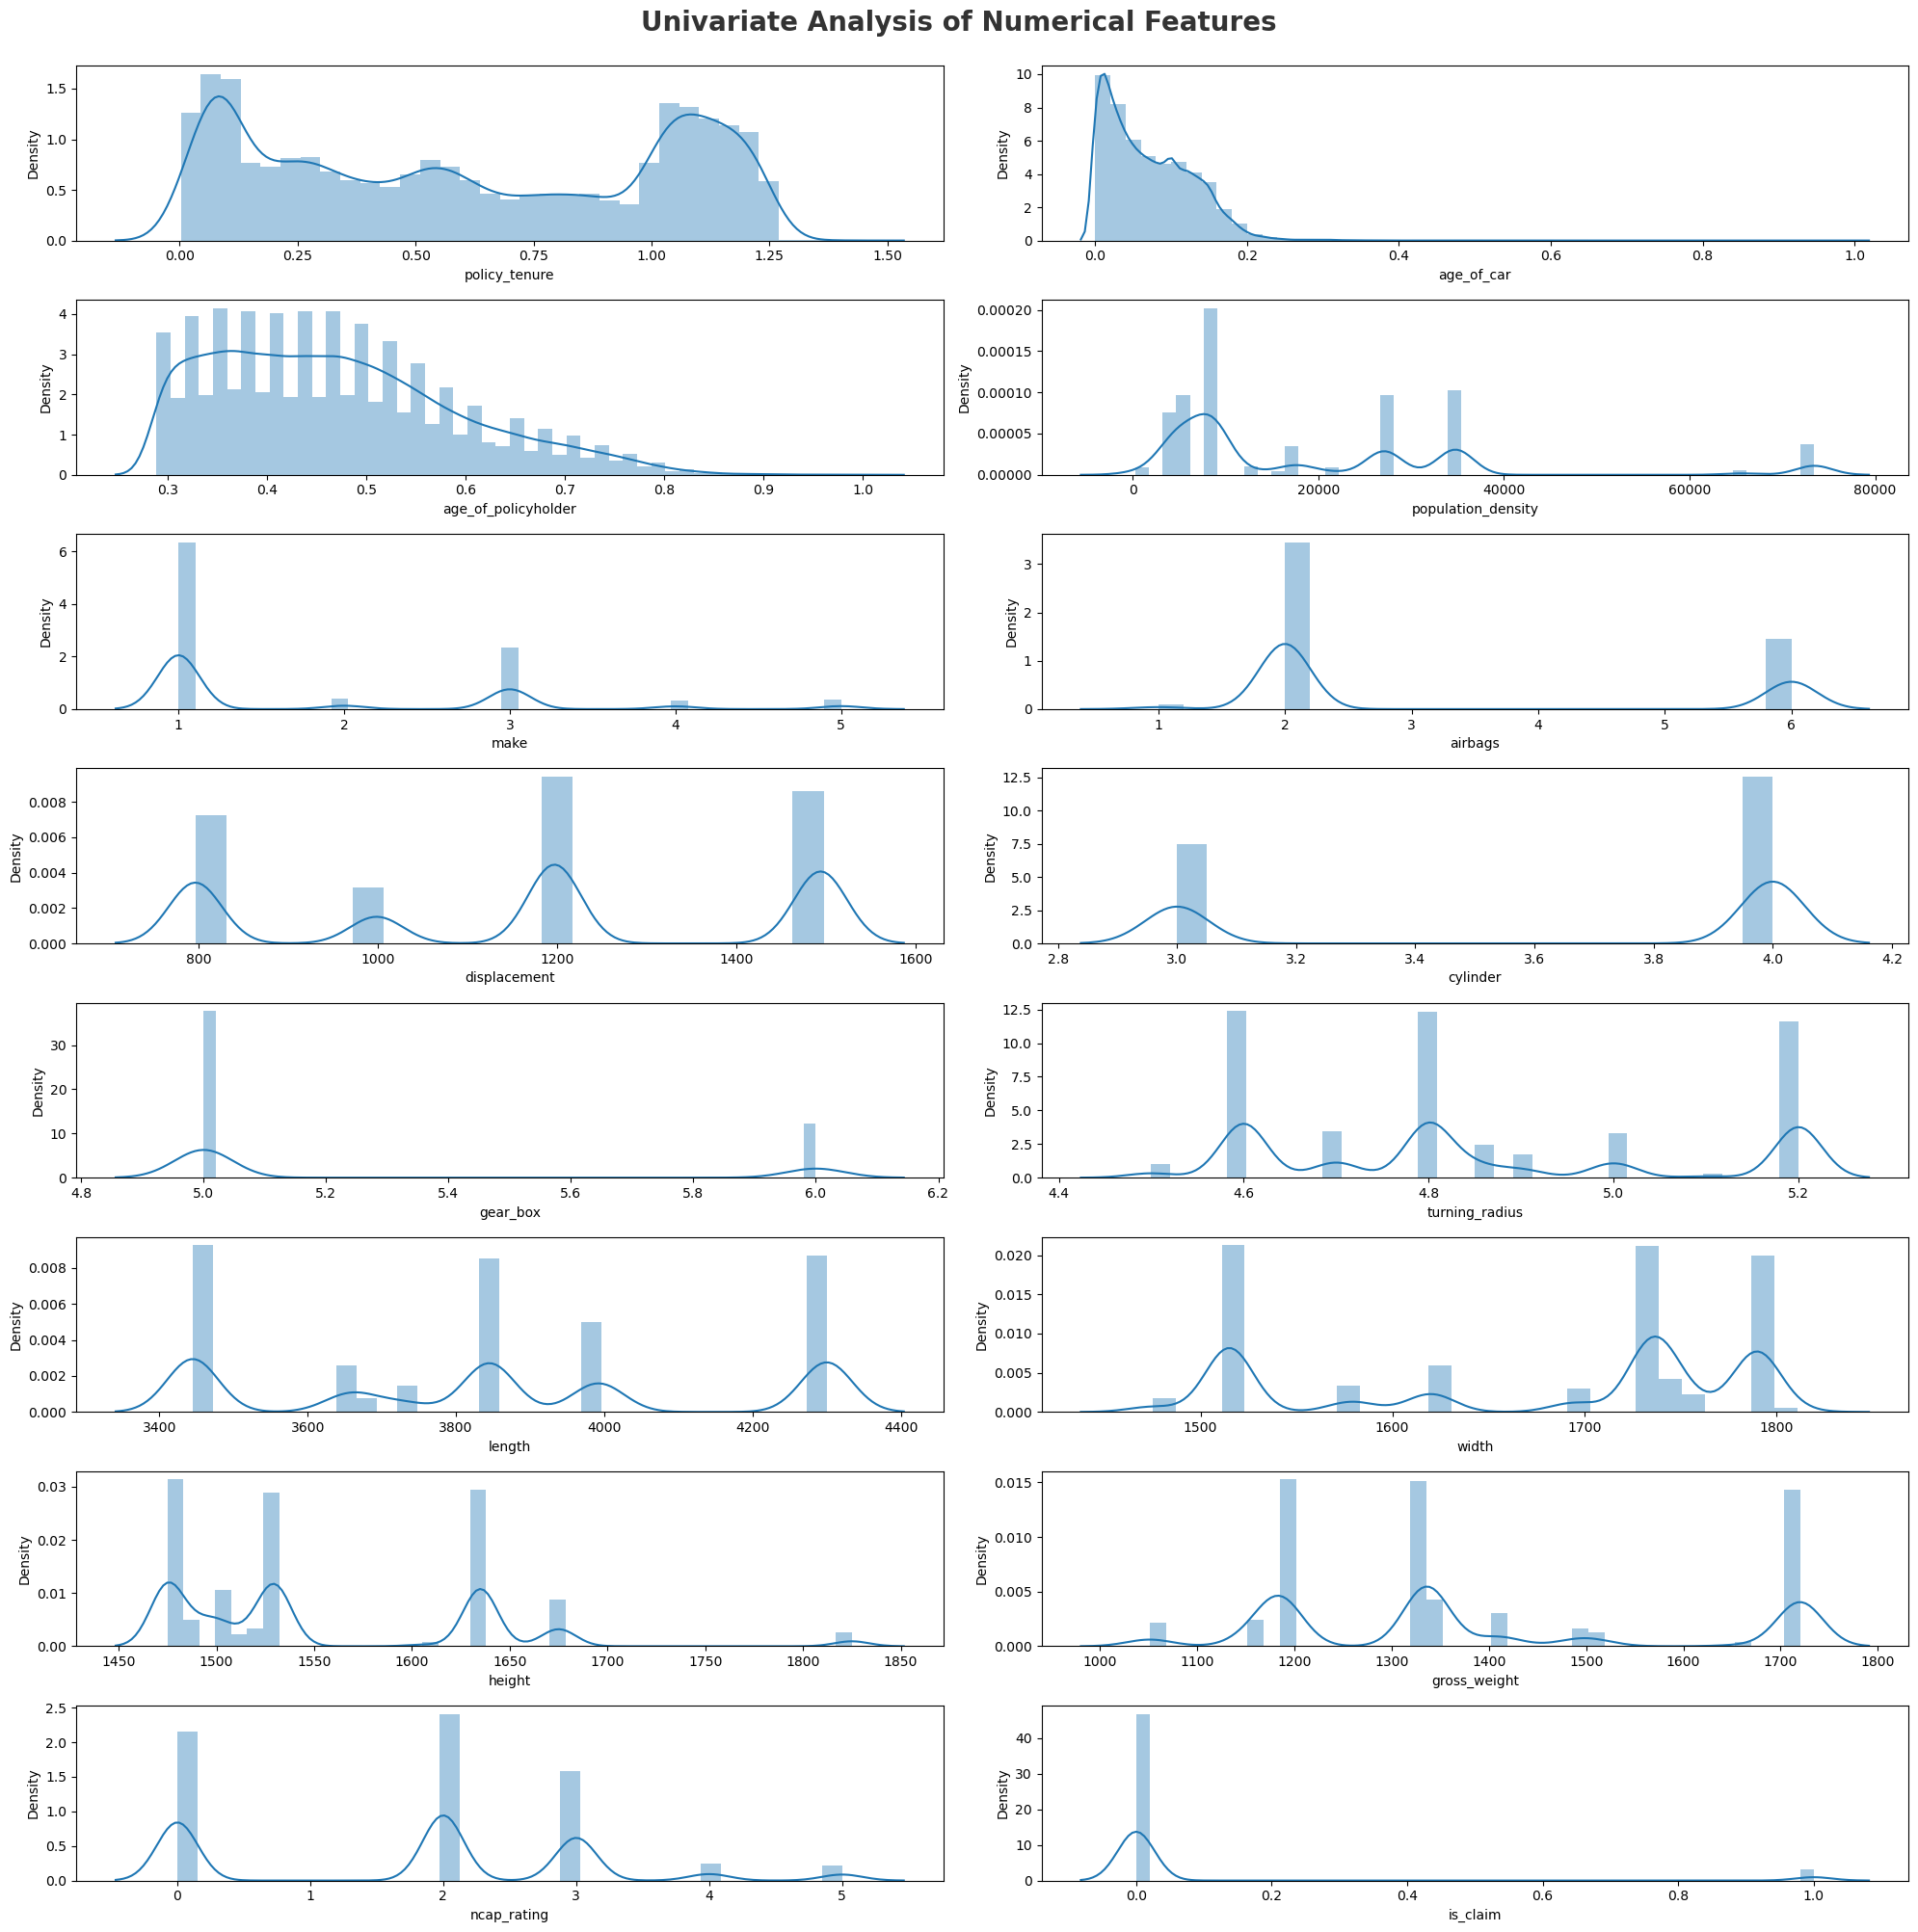

In [15]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(8, 2, i+1)
    sns.distplot(train_df[numerical_feature[i]])
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

In [16]:
train_df=train_df.drop('policy_id',axis=1)

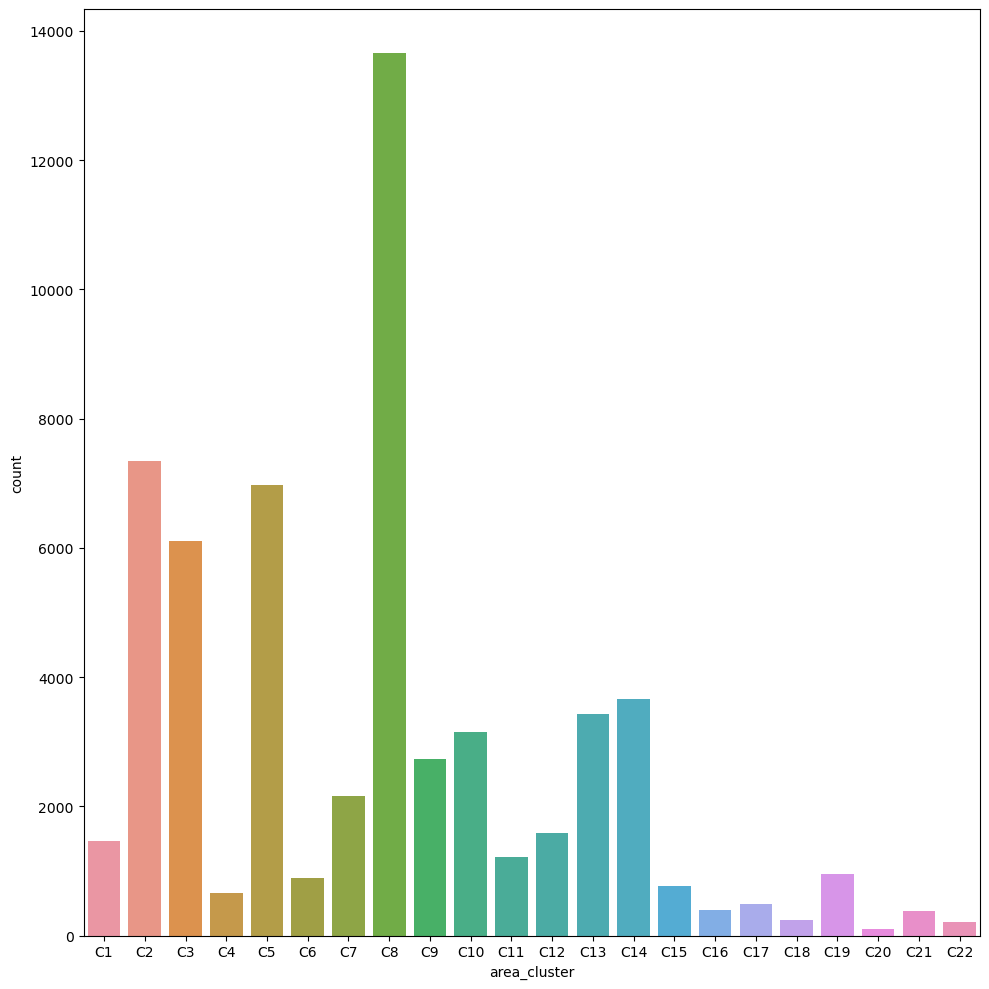

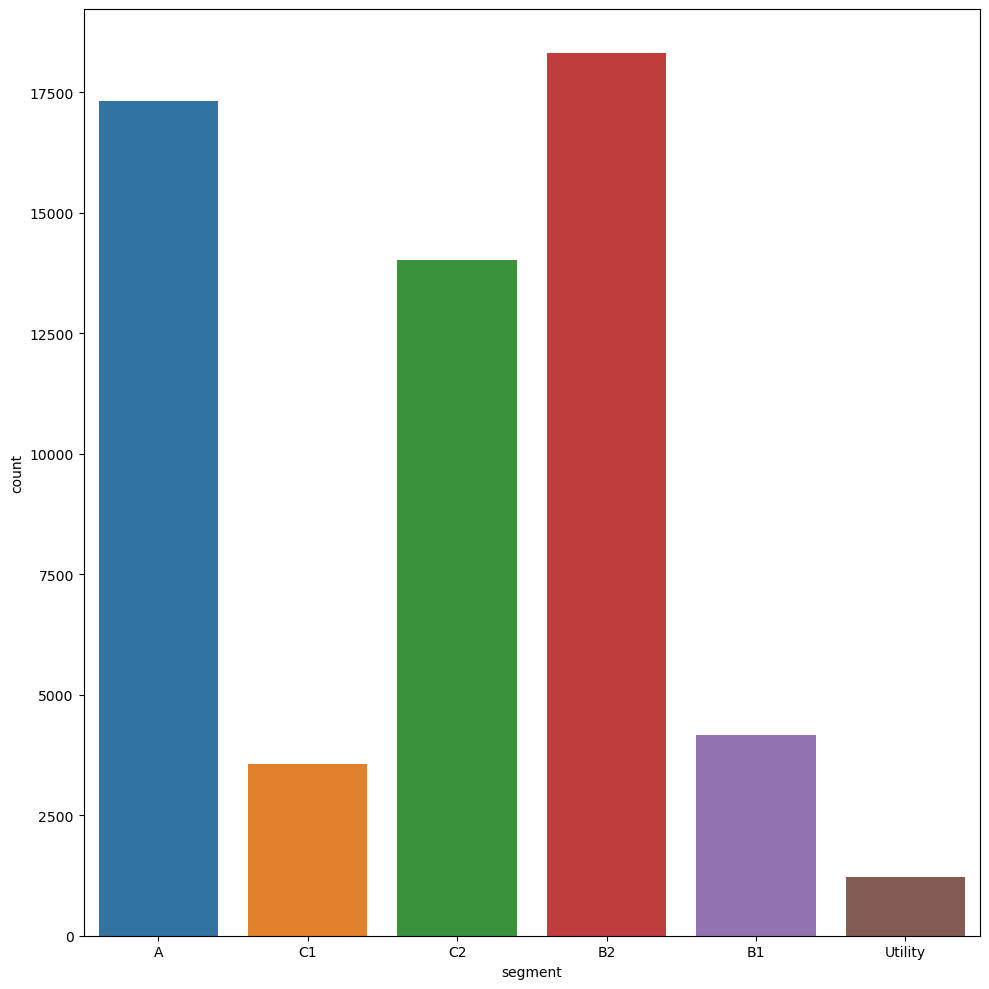

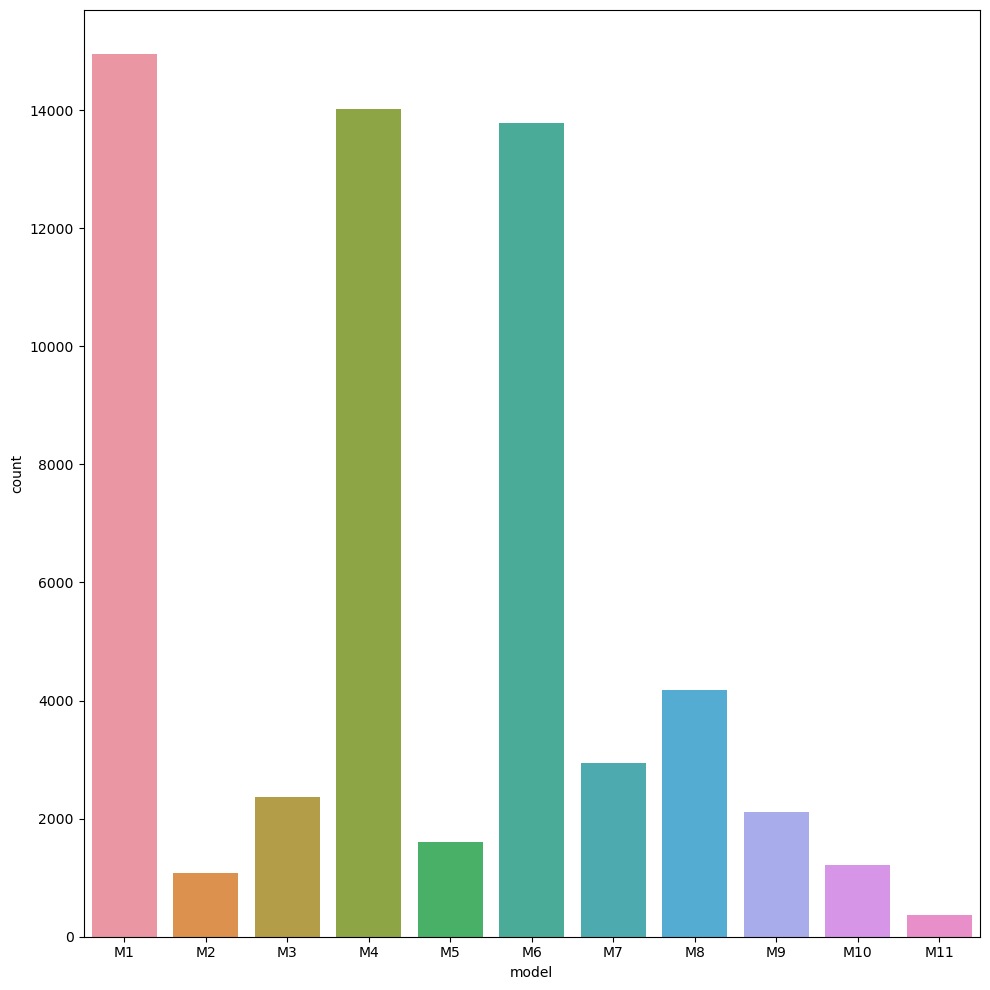

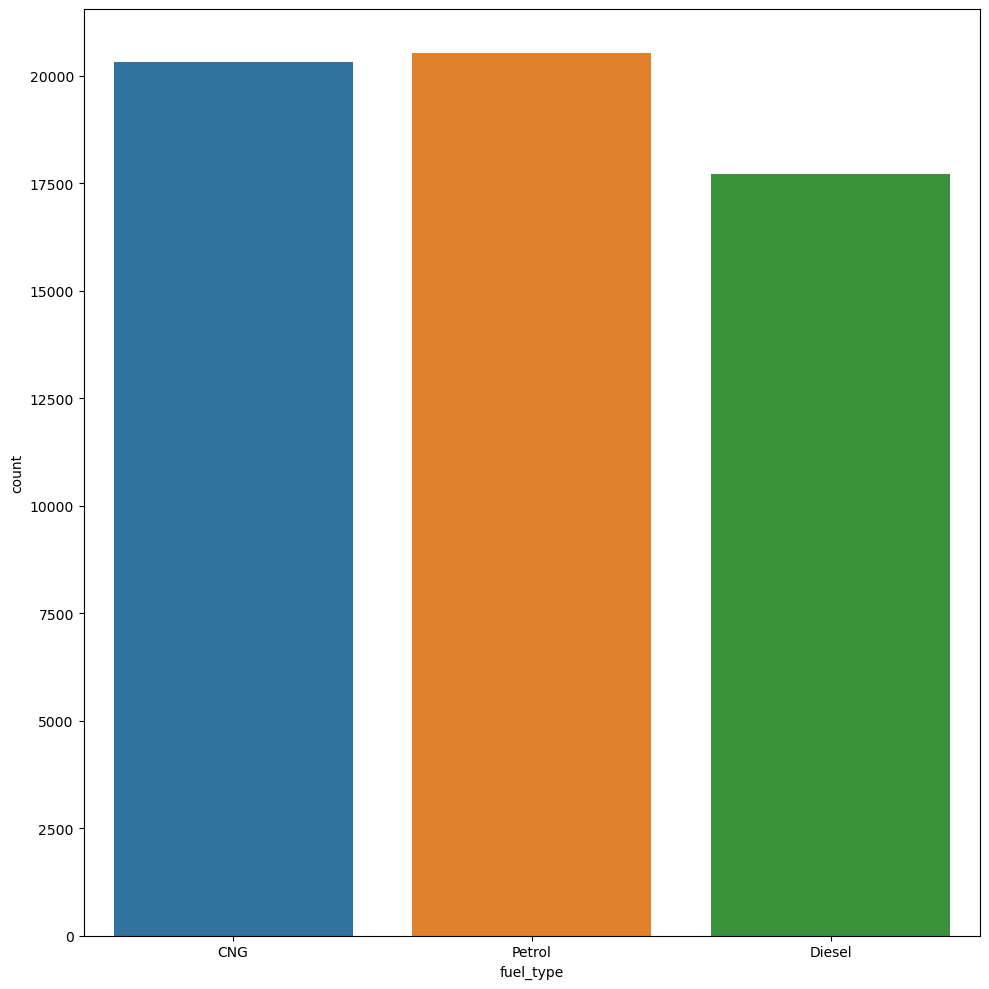

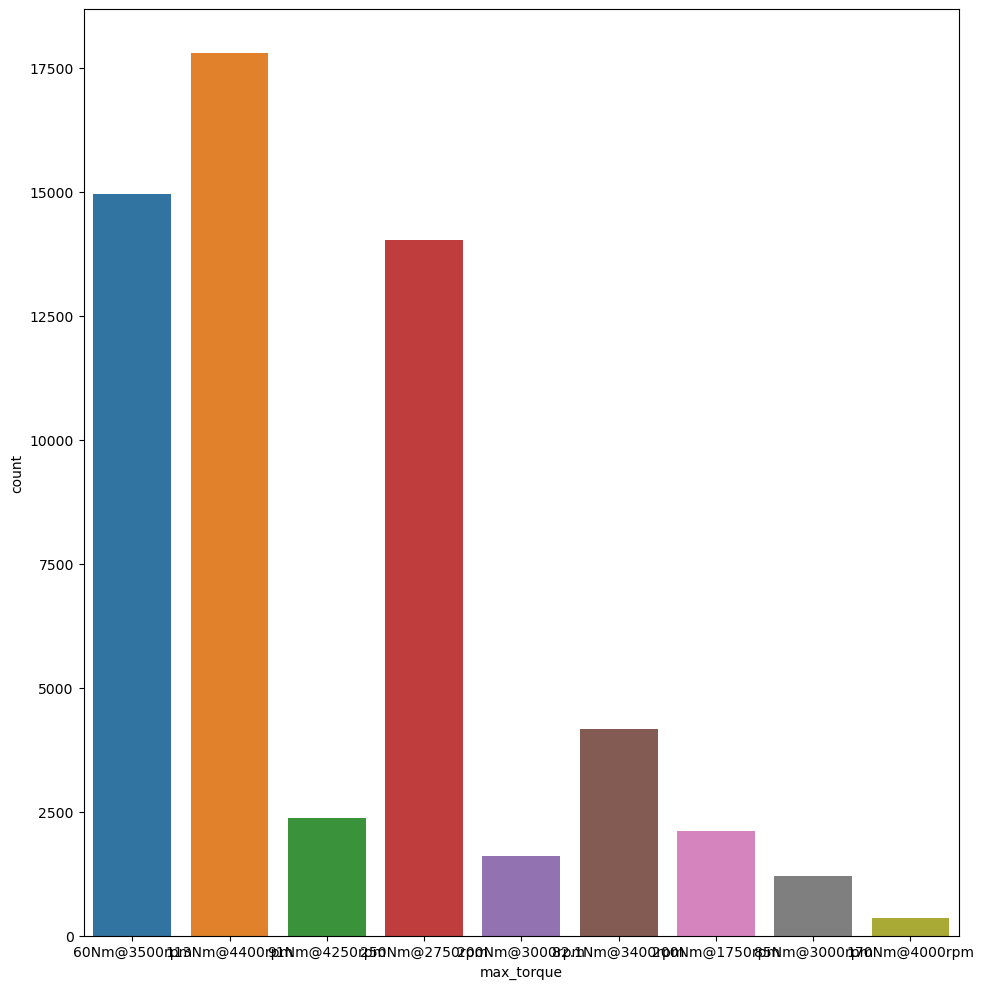

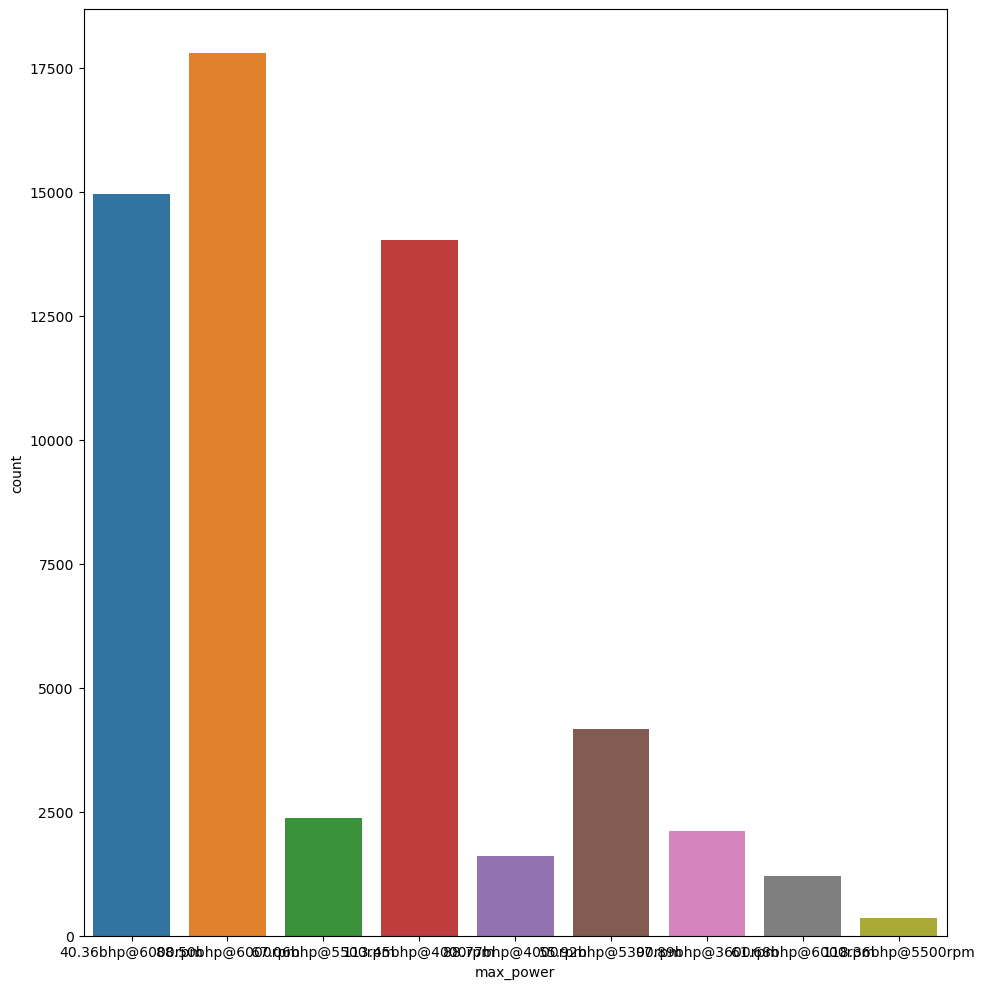

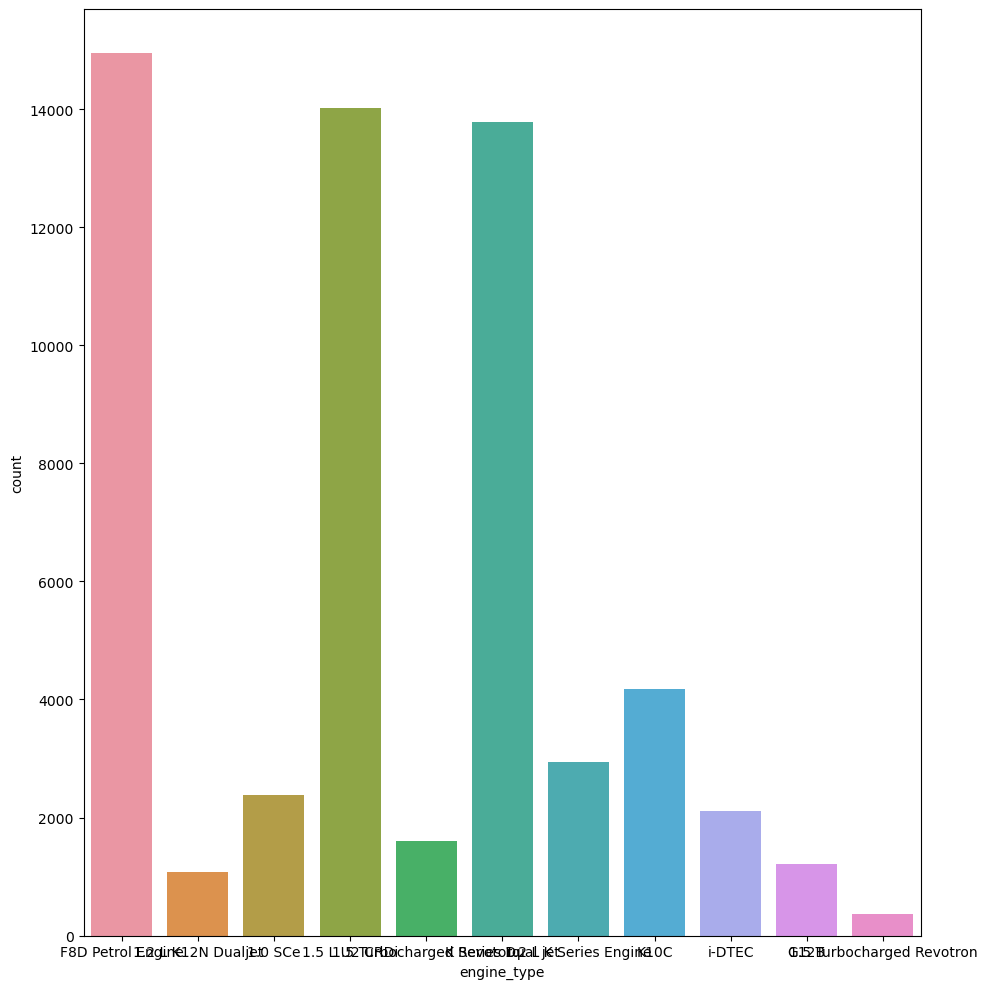

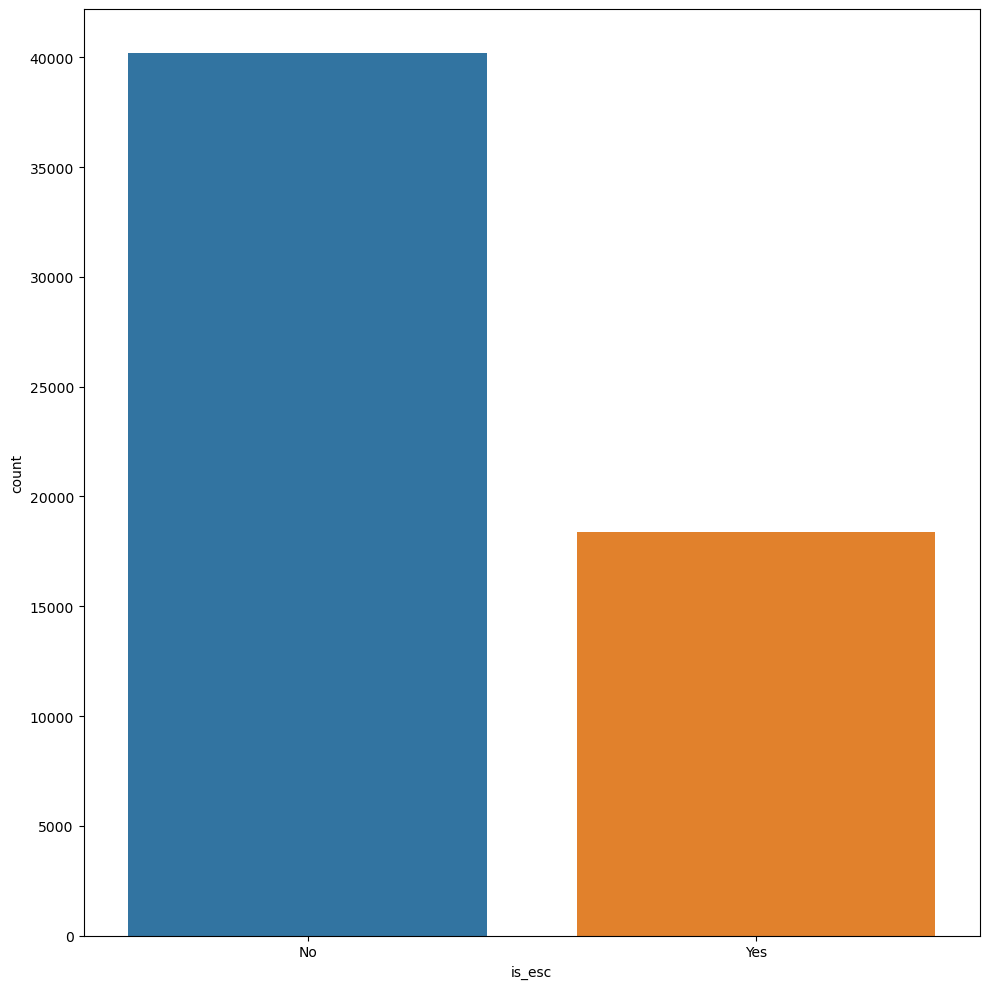

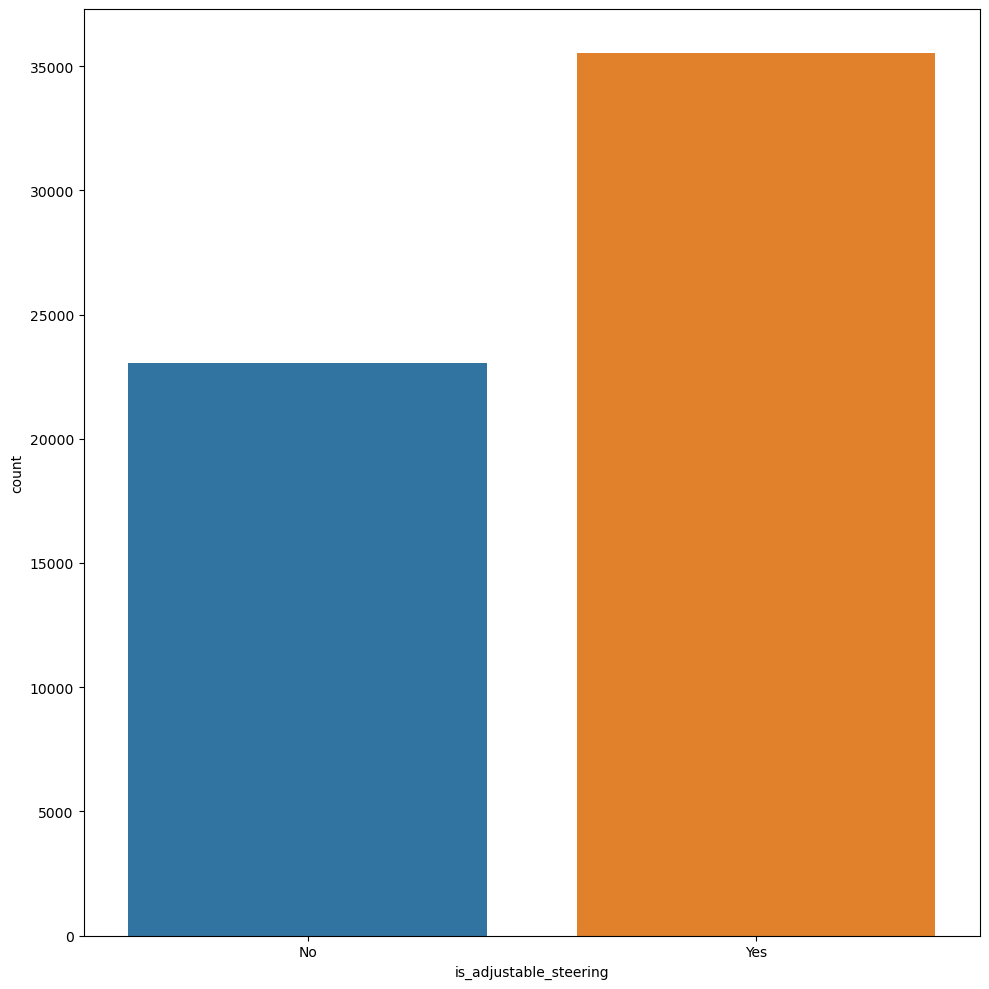

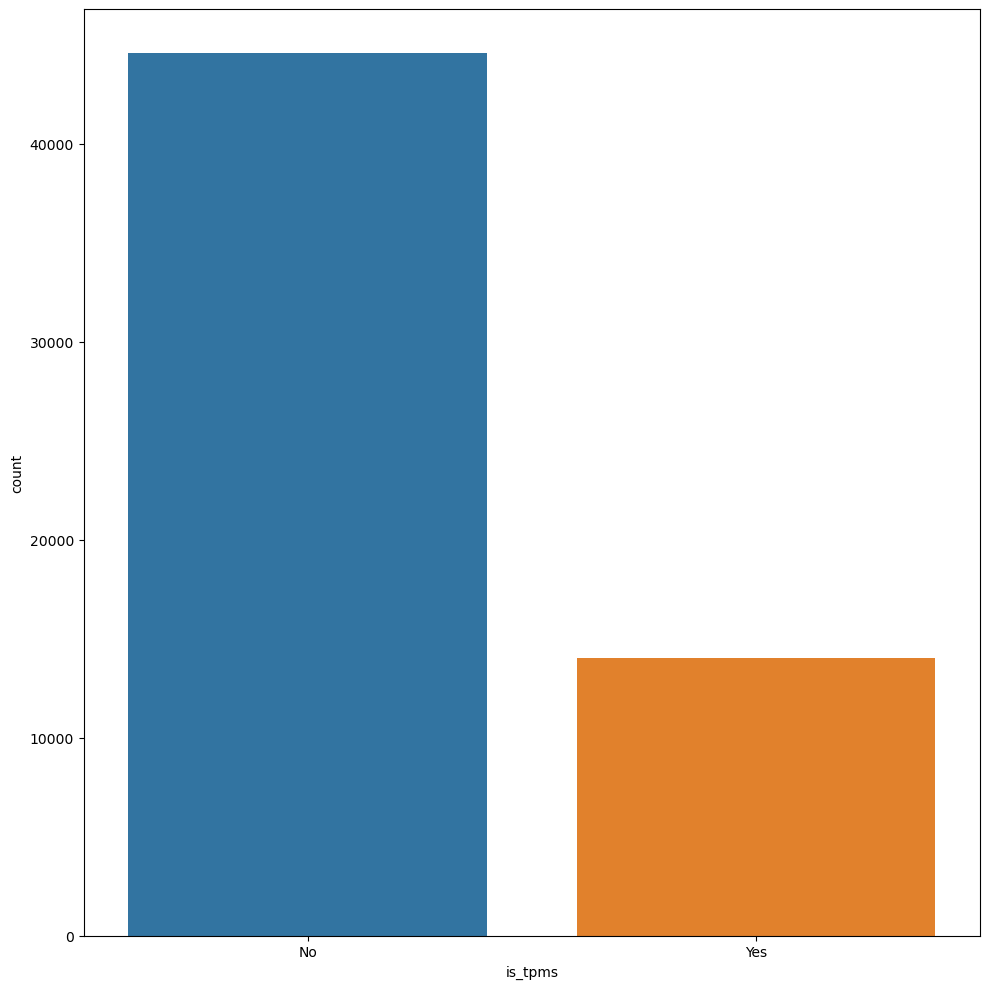

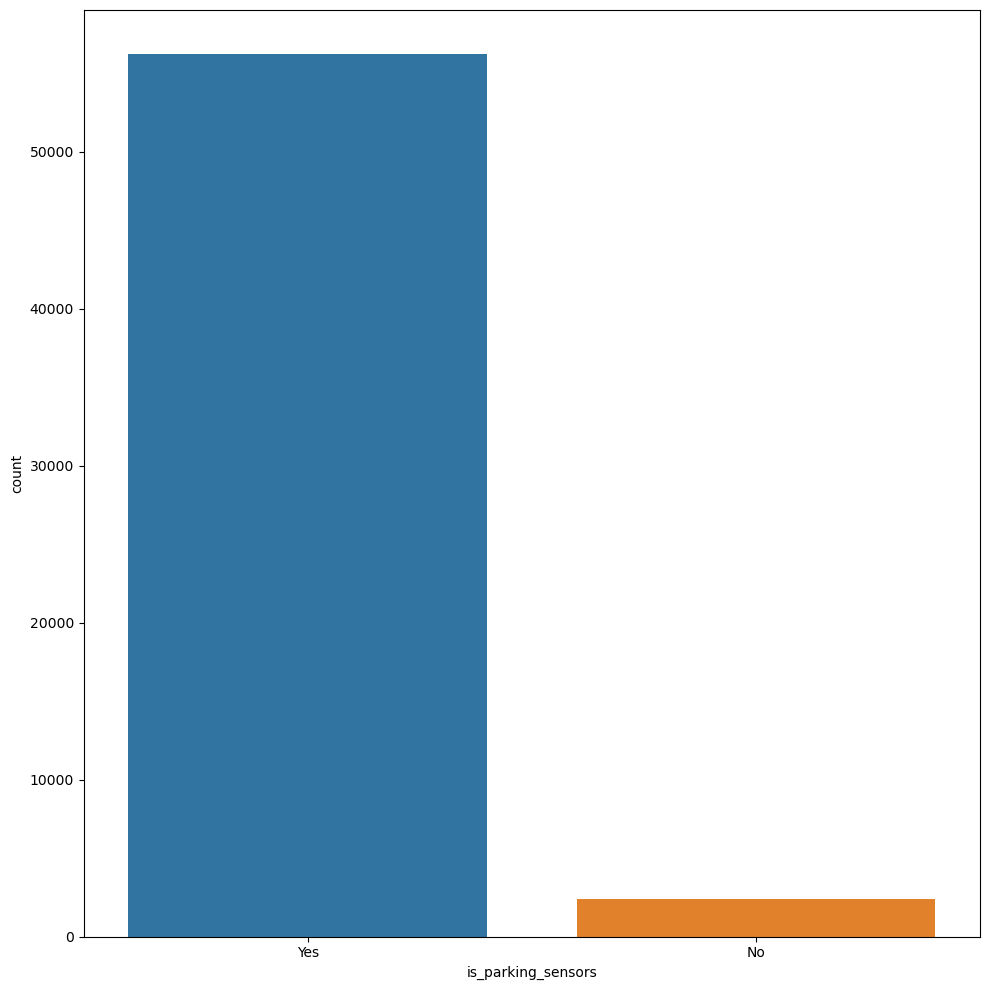

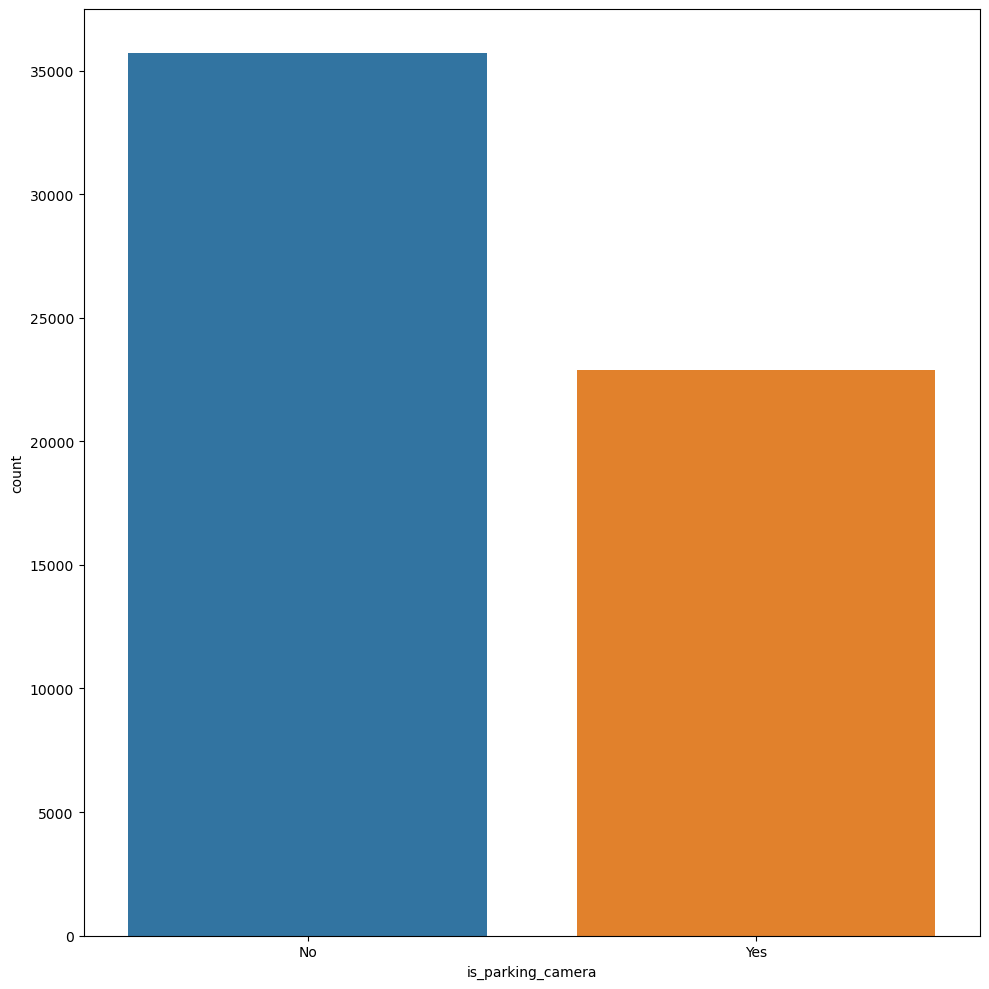

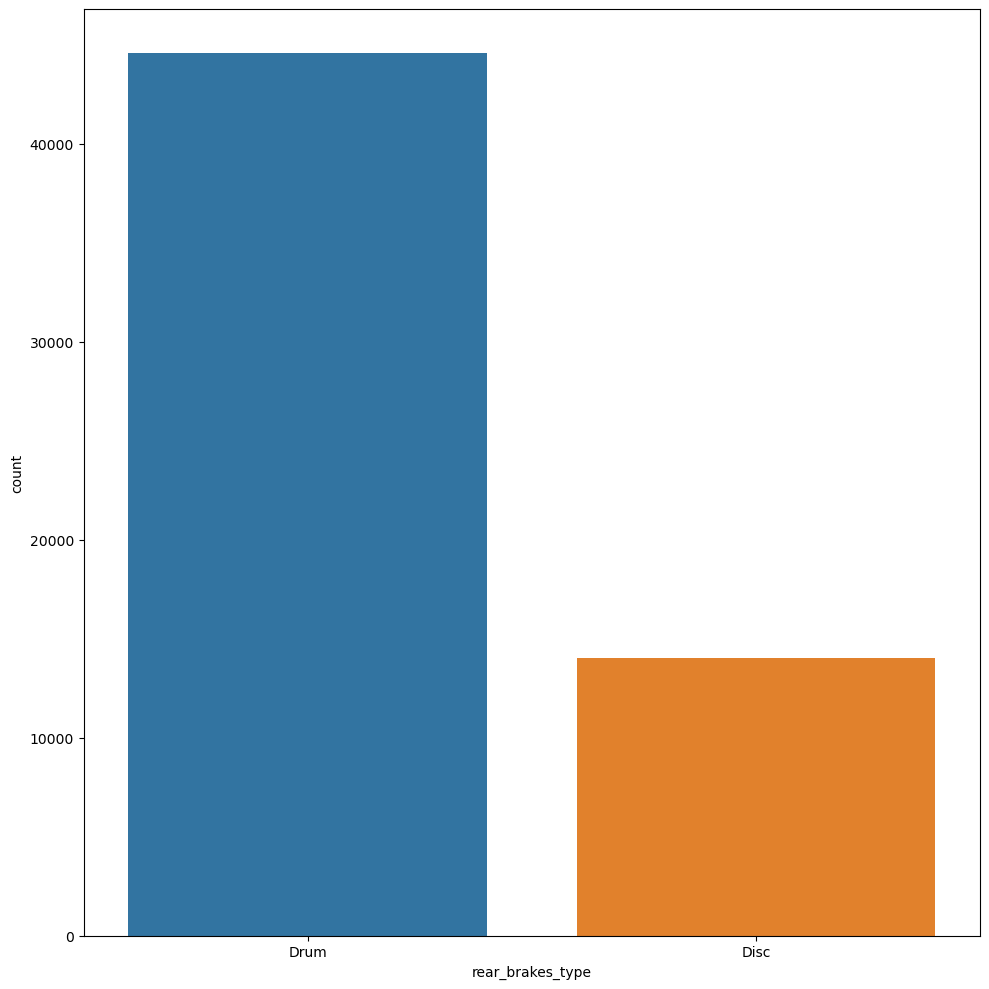

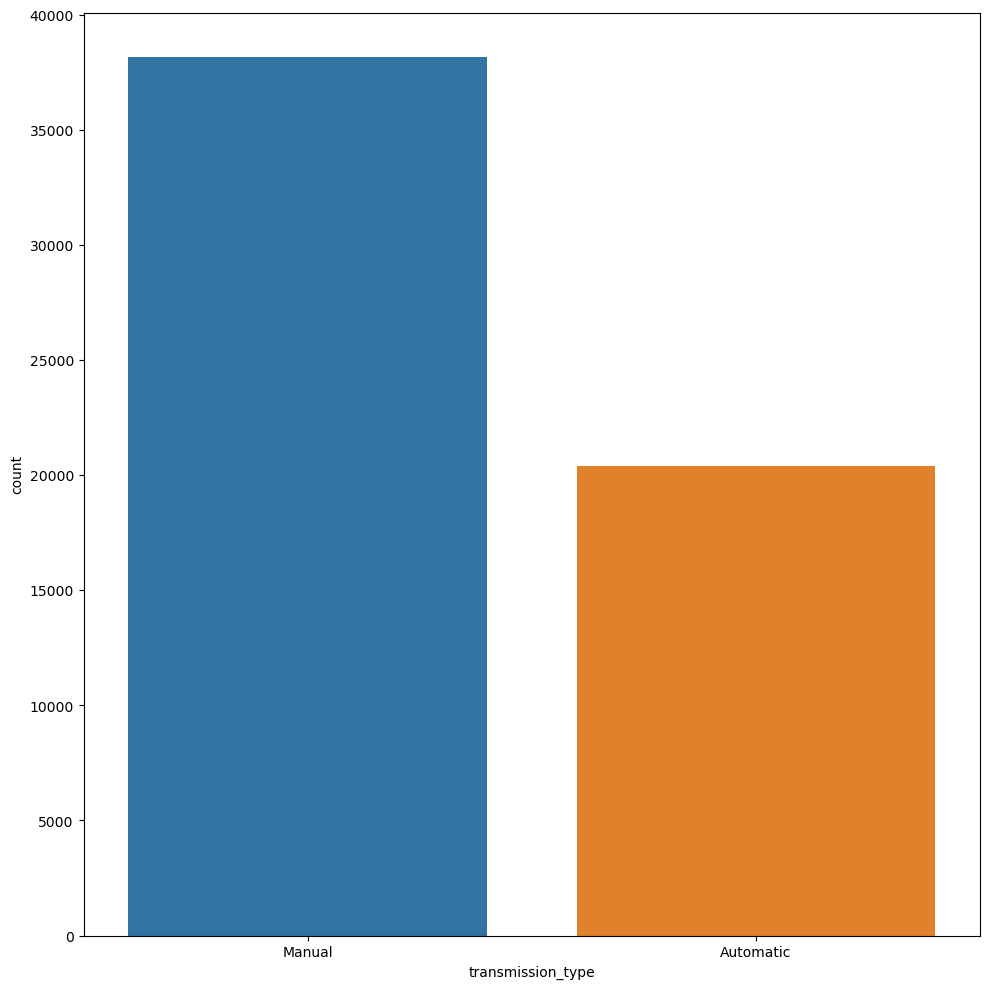

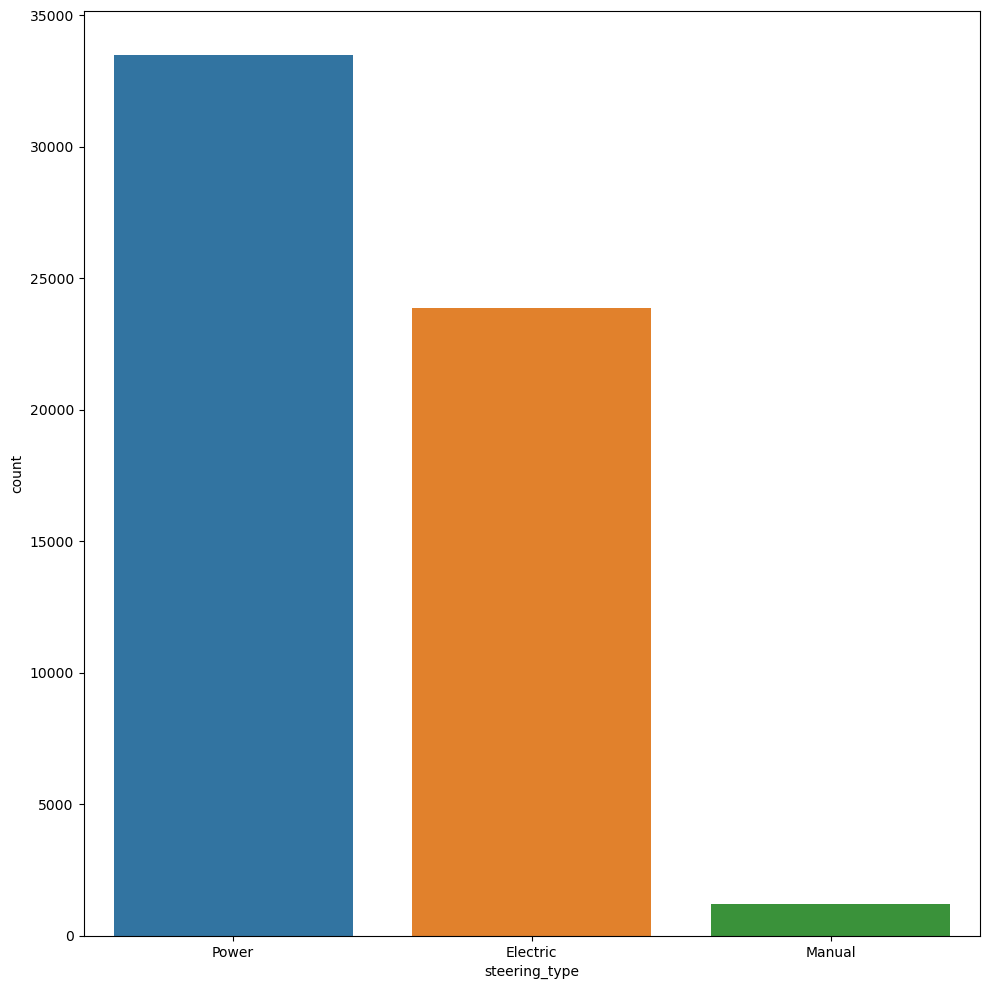

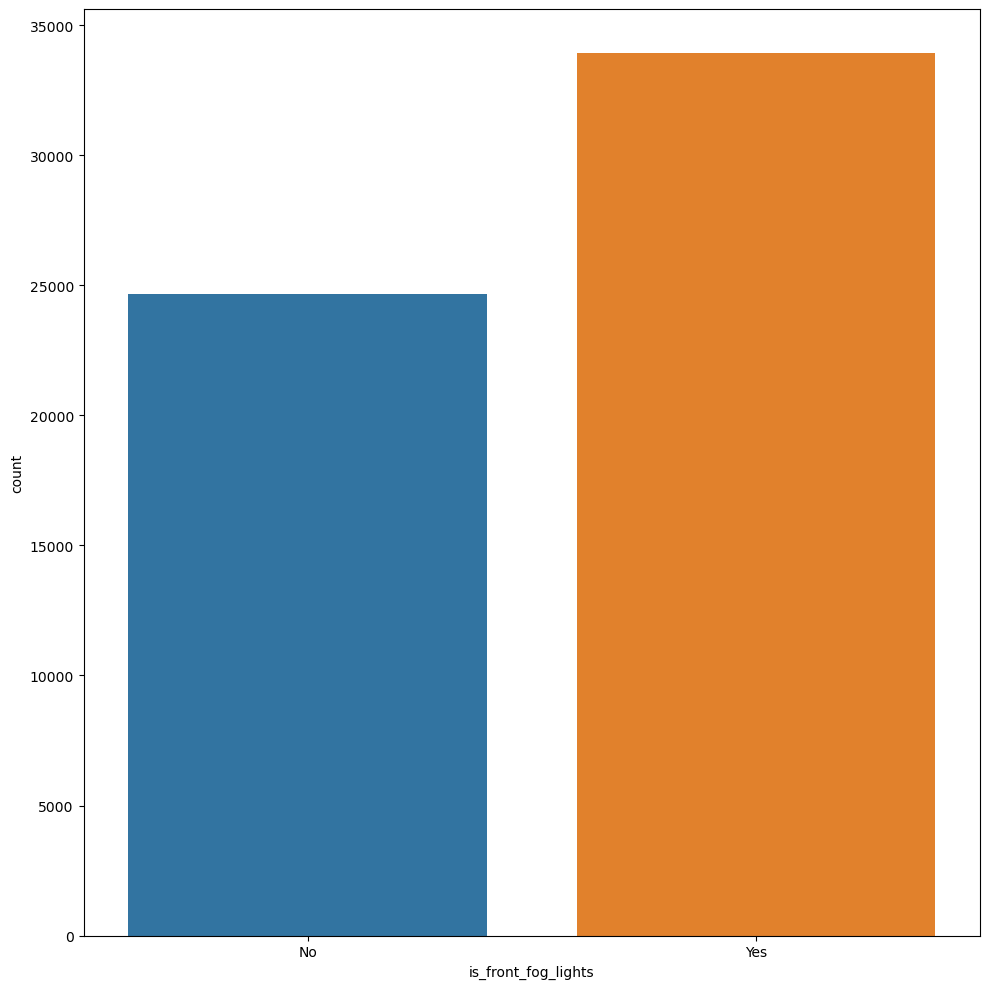

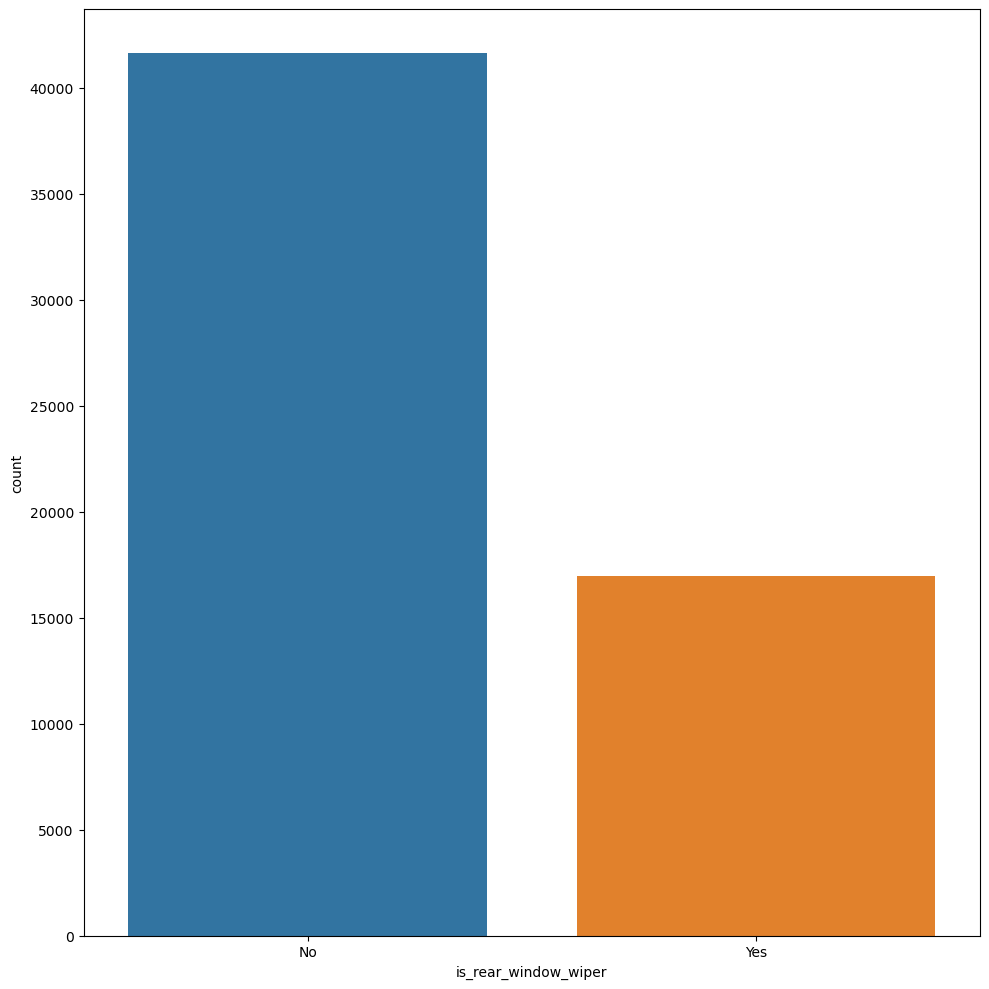

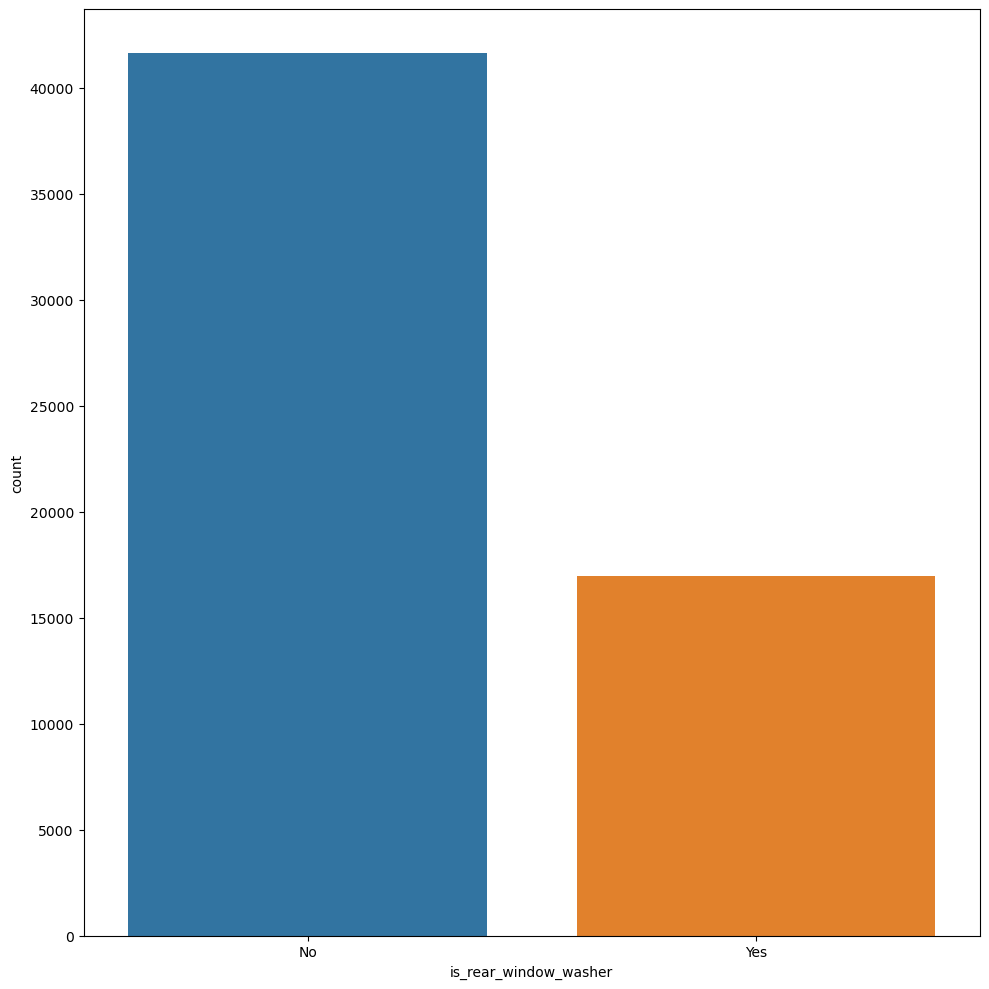

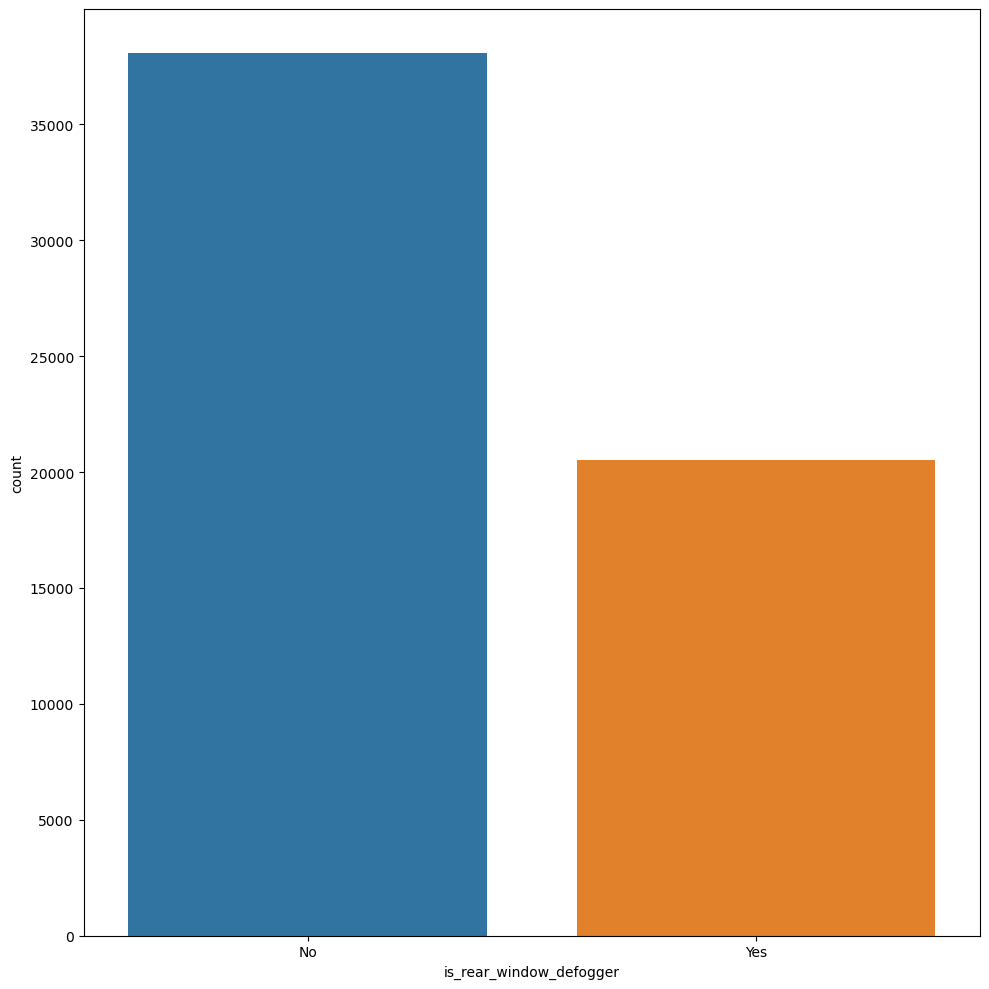

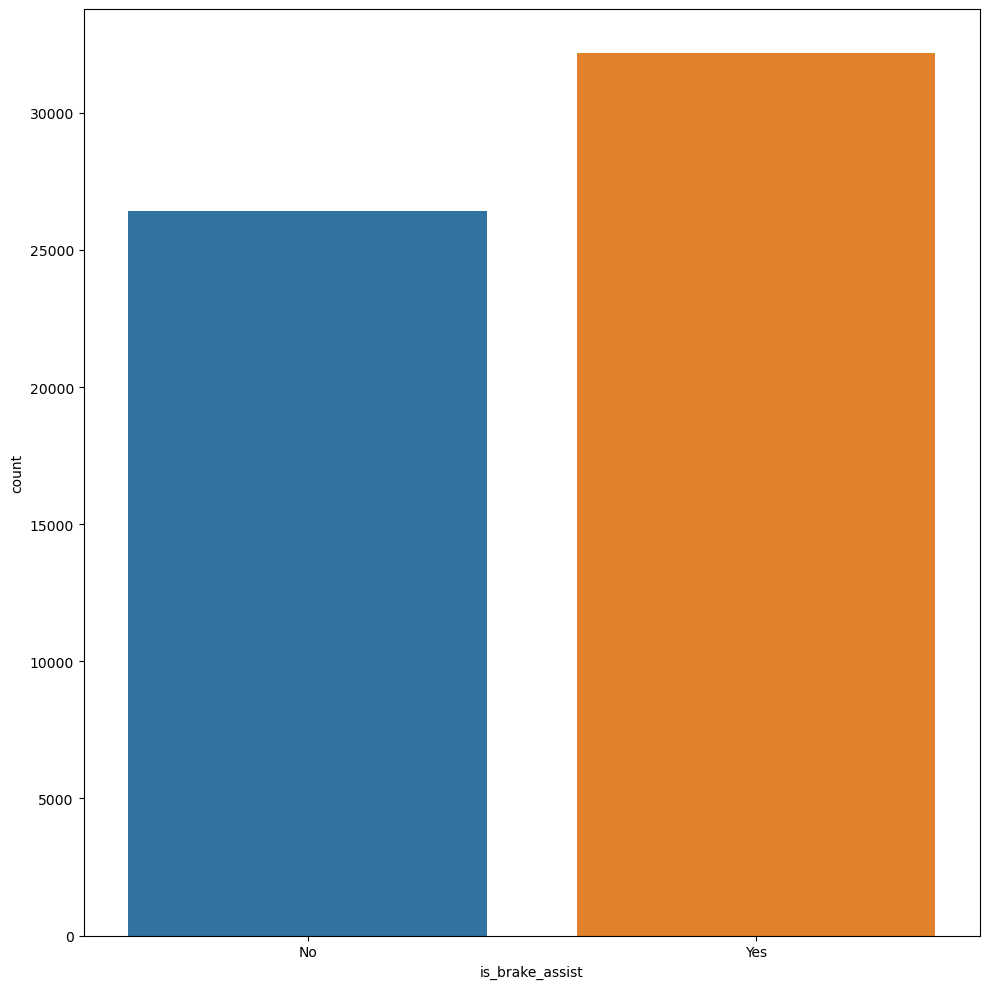

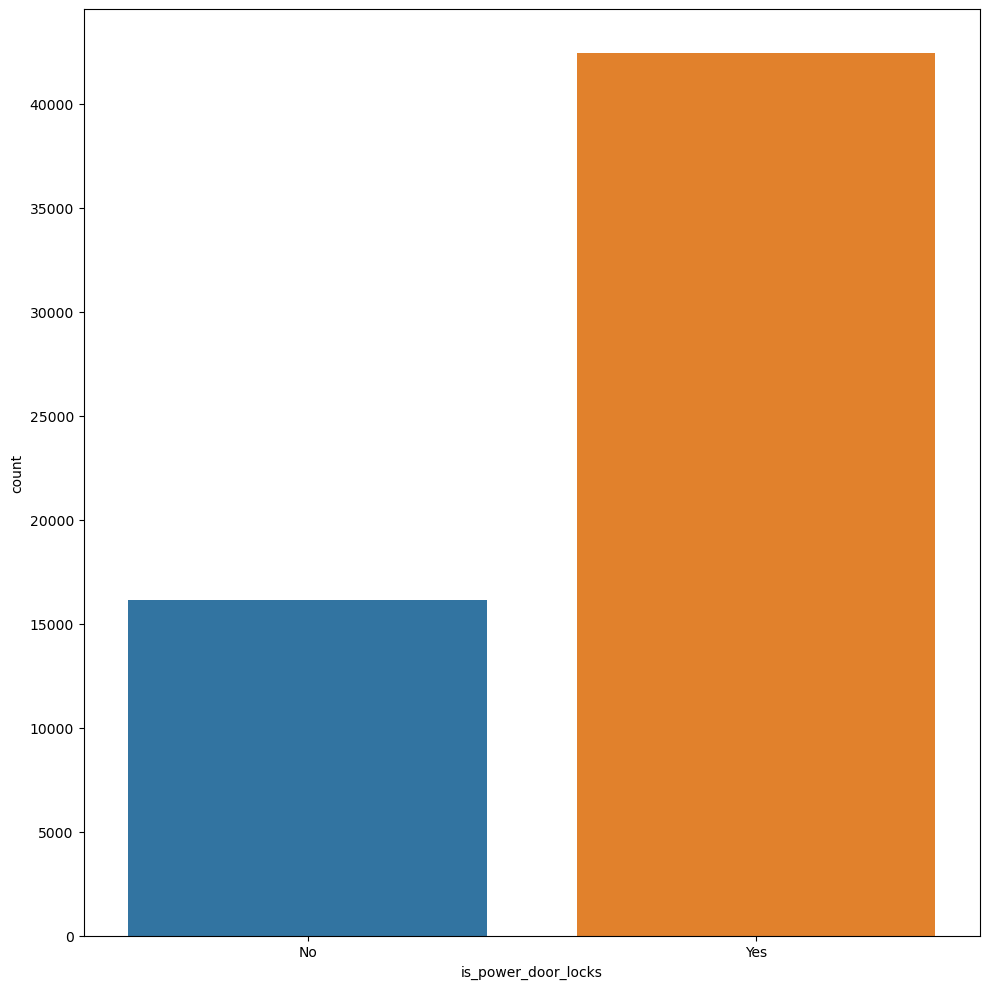

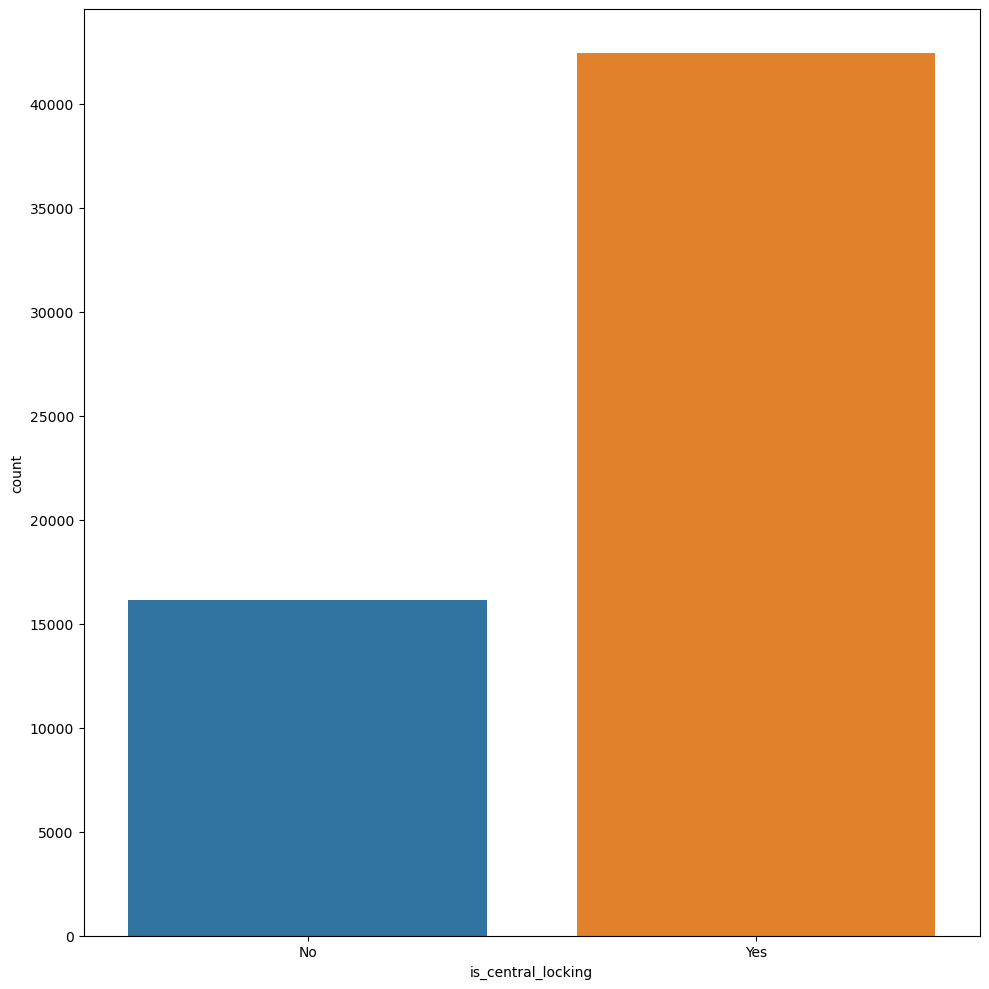

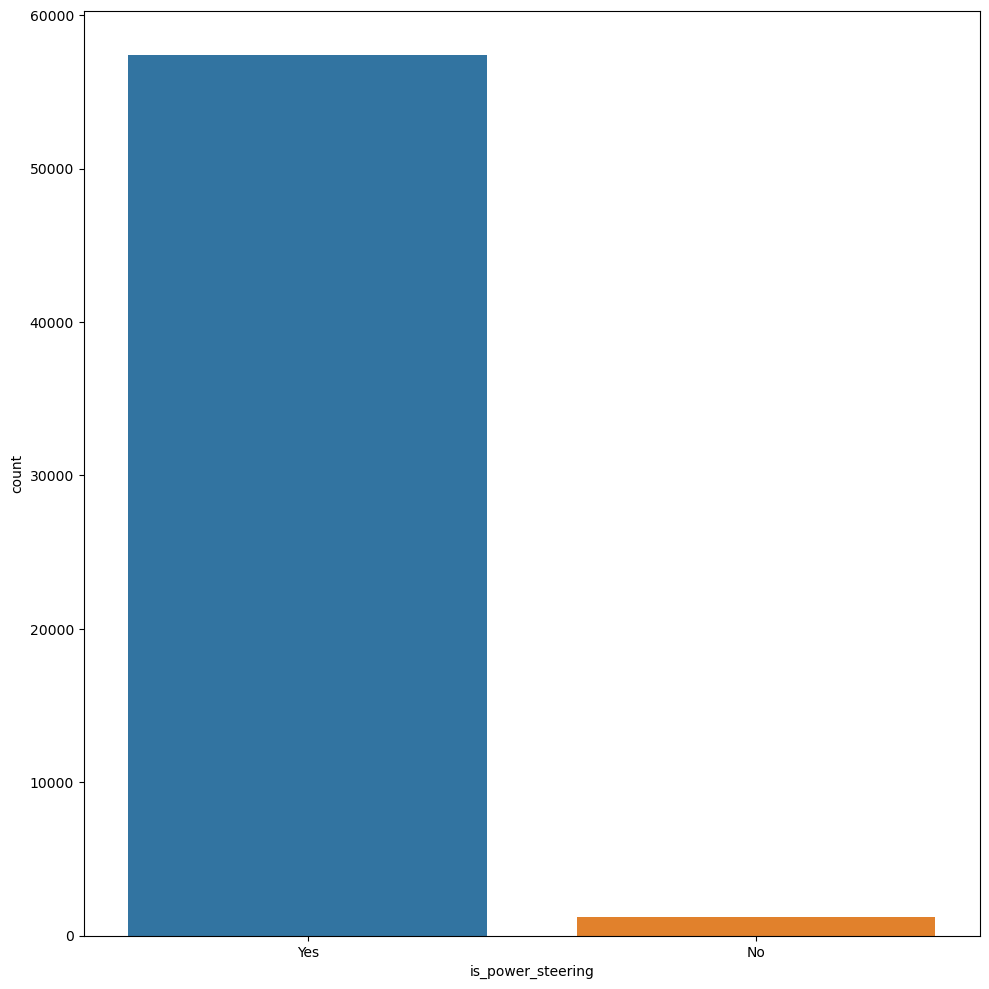

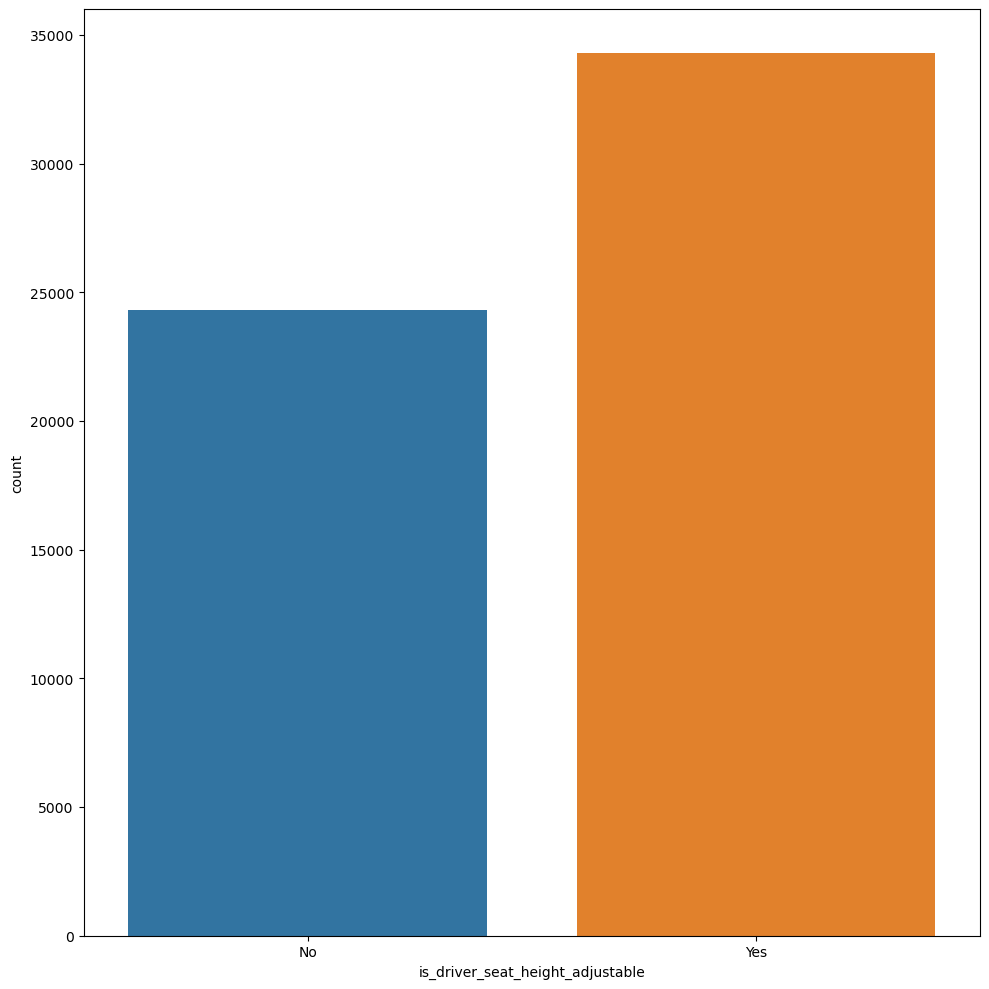

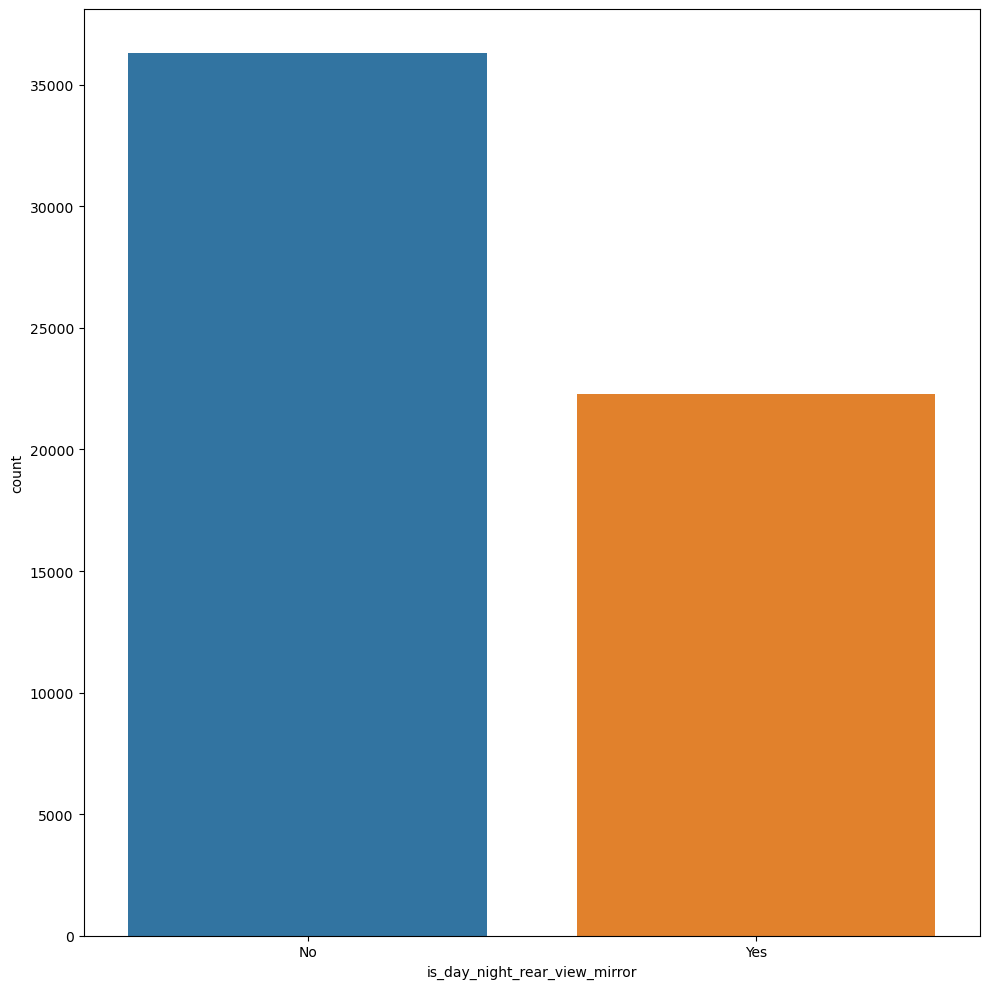

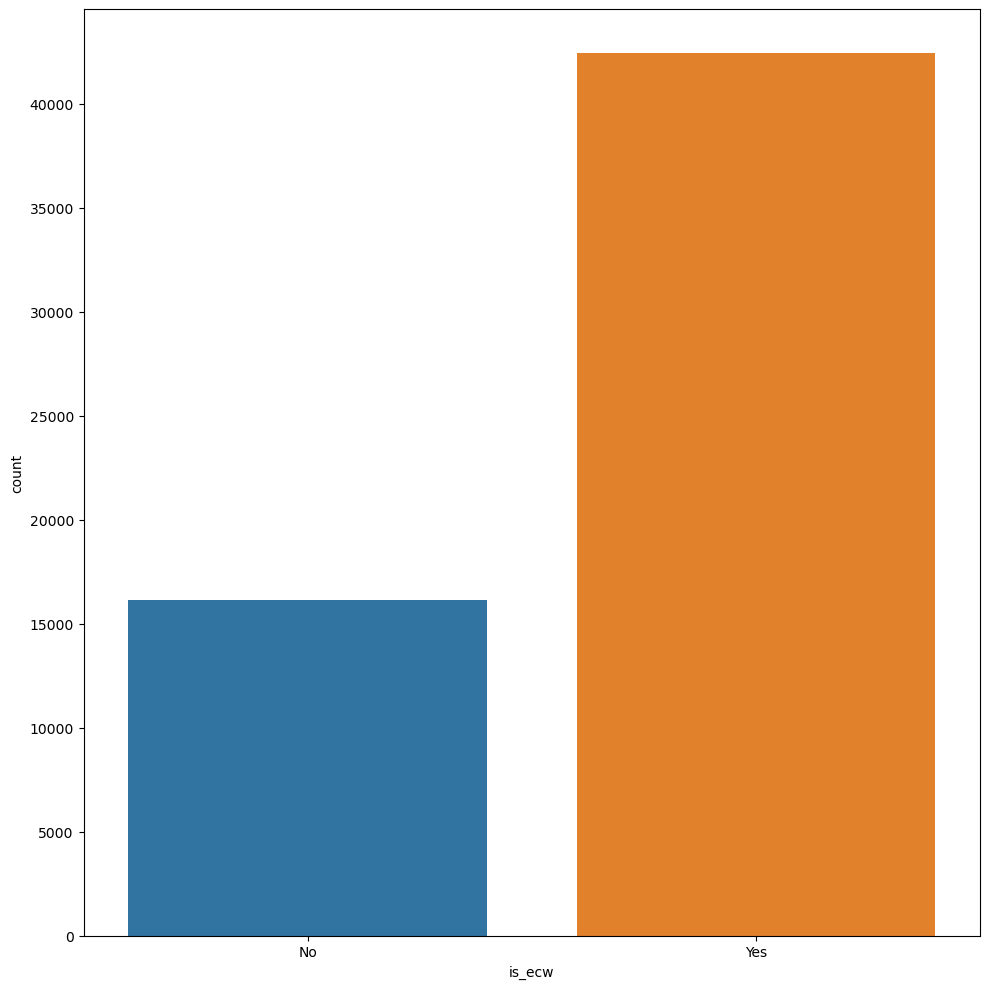

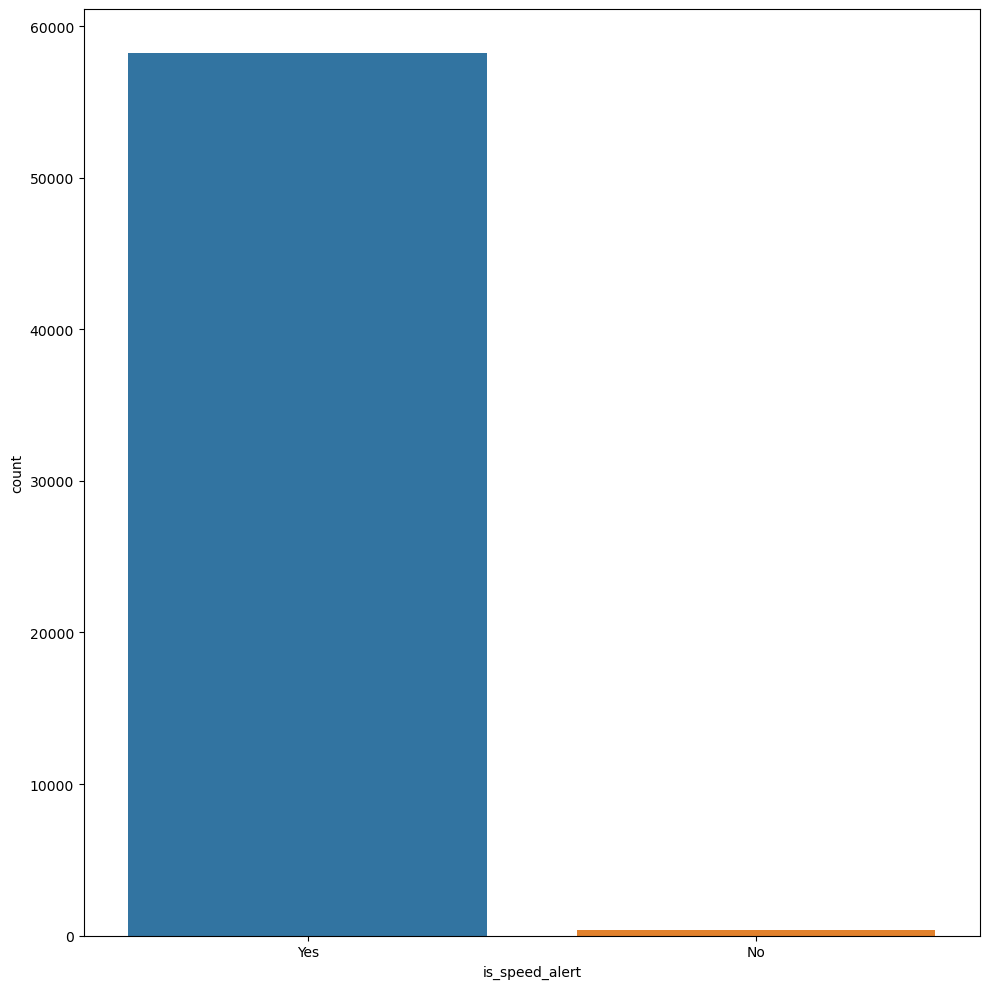

In [17]:

for i in range(1,len(categorical_feature)):
    plt.figure(figsize=(10,10))
    sns.countplot(x=train_df[categorical_feature[i]],data=train_df)
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()

Text(0.5, 1.0, 'Ratio of the target feature')

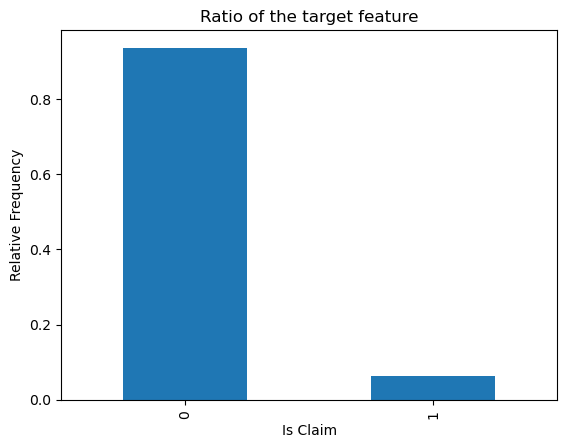

In [18]:
train_df["is_claim"].value_counts(normalize=True).plot(kind="bar")
plt.ylabel("Relative Frequency")
plt.xlabel("Is Claim")
plt.title("Ratio of the target feature")

Text(0.5, 1.0, 'Numbers of sectors based on claims')

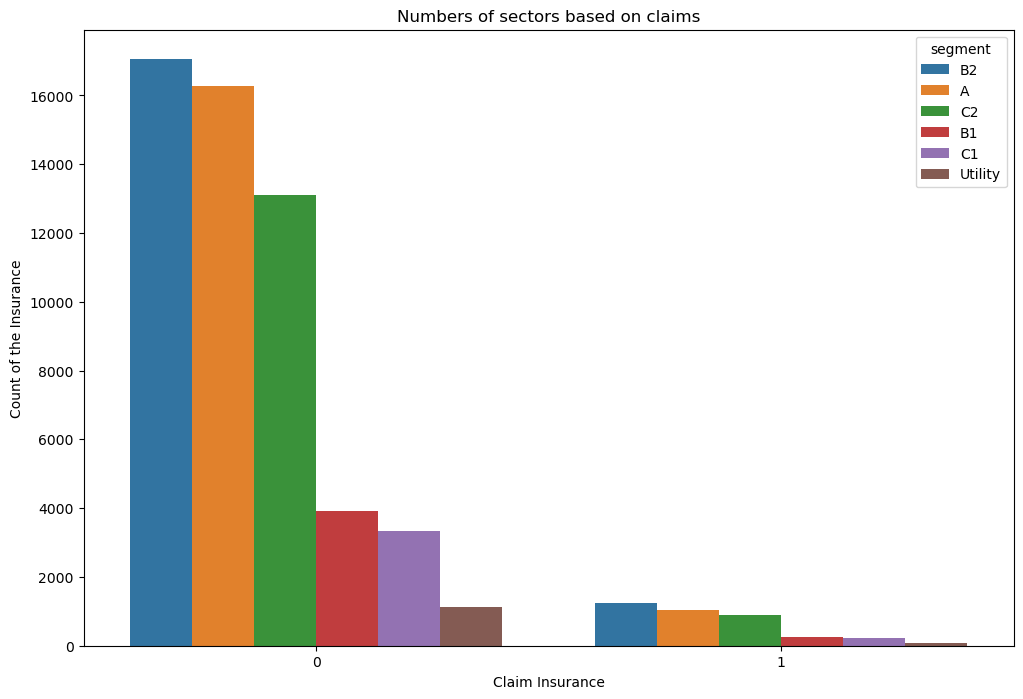

In [19]:
temp_df = train_df.groupby("is_claim")["segment"].value_counts().rename("count").to_frame().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x="is_claim",
           y="count",
           hue="segment",
           data=temp_df)
plt.xlabel("Claim Insurance")
plt.ylabel("Count of the Insurance")
plt.title("Numbers of sectors based on claims")

<Axes: xlabel='model'>

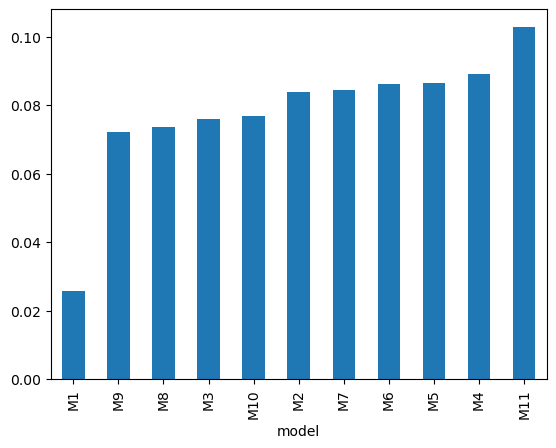

In [20]:
train_df.groupby("model")["age_of_car"].mean().sort_values().plot(kind="bar")

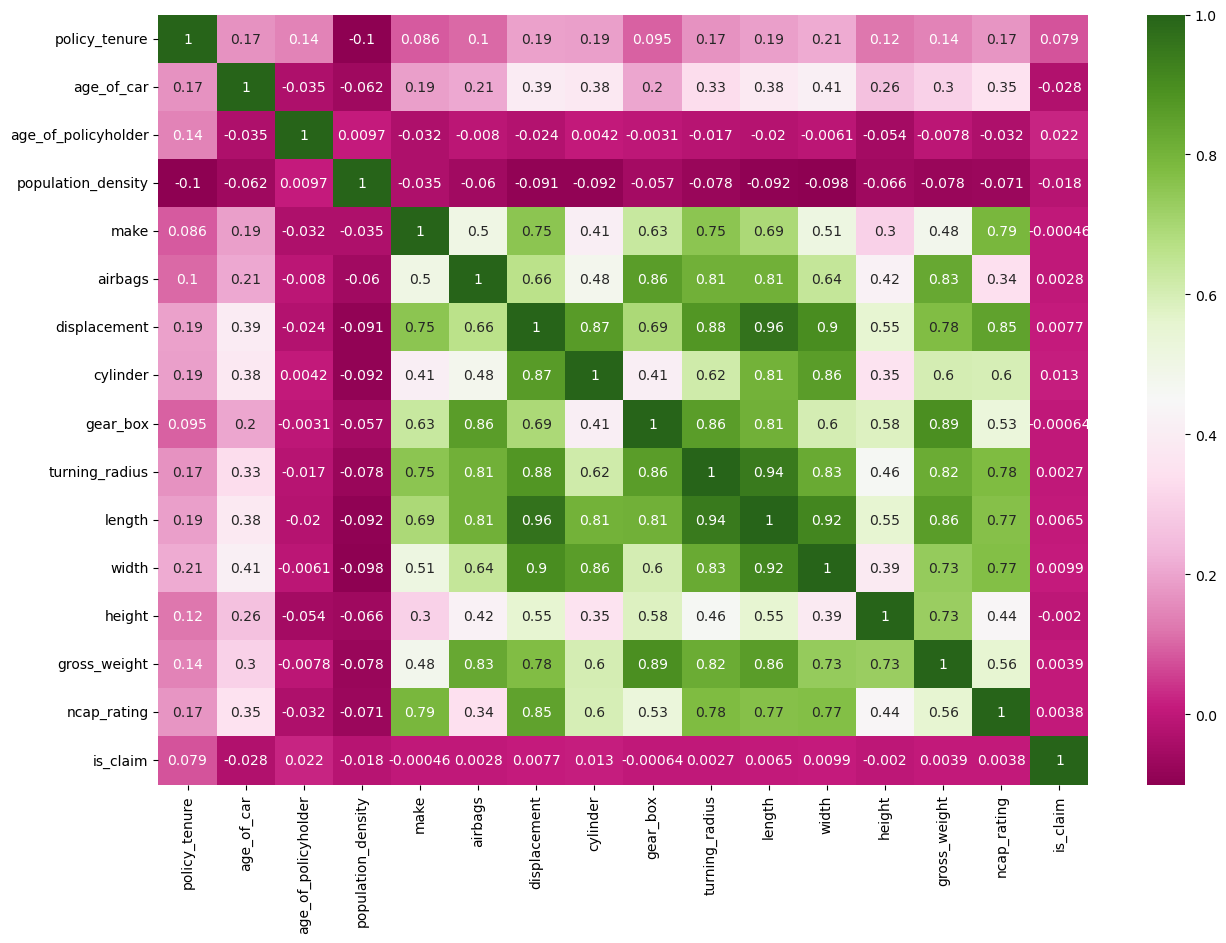

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.corr(), annot=True, cmap="PiYG", annot_kws={"size": 10})
plt.show()

In [22]:
test_df=test_df.drop('policy_id',axis=1)

In [23]:
train_cpy = train_df.copy()
test_cpy = test_df.copy()

In [24]:
test_cpy

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
4,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,113Nm@4400rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
39059,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
39060,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
39061,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


In [25]:
numerical_feature_copy=[i for i in train_df.columns if train_df[i].dtype!='O']
categorical_feature_copy=[i for i in train_df.columns if train_df[i].dtype=='O']

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:
for i in categorical_feature_copy : 
    train_cpy[i] = le.fit_transform(train_cpy[i])

In [29]:
train_cpy

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,20,8794,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0
58588,1.199642,0.02,0.519231,5,7788,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
58589,1.162273,0.05,0.451923,17,34738,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
58590,1.236307,0.14,0.557692,20,8794,1,2,7,2,0,...,1,1,1,1,1,1,1,1,2,0


In [30]:
for i in categorical_feature_copy : 
    test_cpy[i] = le.fit_transform(test_cpy[i])

In [31]:
test_cpy

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.341732,0.00,0.586538,15,4076,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
1,0.307241,0.13,0.442308,20,8794,1,2,7,2,0,...,0,1,1,1,1,1,1,1,1,2
2,0.327924,0.12,0.451923,20,8794,2,0,4,2,8,...,0,0,1,1,1,0,1,1,1,2
3,0.782654,0.01,0.461538,17,34738,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
4,1.233404,0.02,0.634615,17,34738,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,0.047982,0.15,0.740385,11,27003,1,2,7,2,0,...,0,1,1,1,1,1,1,1,1,2
39059,1.224838,0.05,0.509615,20,8794,3,4,5,1,4,...,1,1,1,1,1,1,0,1,1,3
39060,0.520287,0.12,0.355769,18,13051,1,2,8,2,0,...,1,1,1,1,1,1,1,1,1,0
39061,1.172391,0.08,0.644231,17,34738,1,3,3,2,0,...,1,1,1,1,1,1,1,1,1,2


In [32]:
X = train_cpy.drop(['is_claim'], axis=1)
y = train_cpy['is_claim']

In [33]:
X.shape

(58592, 42)

In [34]:
y.shape

(58592,)

# Handle Imbalance datasets

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## 1. Cross Validation with Hyperpaqrameter Tuning

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [38]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [40]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [41]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16480     0]
 [ 1098     0]]
0.9375355558083969
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16480
           1       0.00      0.00      0.00      1098

    accuracy                           0.94     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.88      0.94      0.91     17578



## 2. Under Sampling

In [42]:
Counter(y_train)

Counter({0: 38364, 1: 2650})

In [43]:
ns=NearMiss()


In [44]:
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)


In [45]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 38364, 1: 2650})
The number of classes after fit Counter({0: 2650, 1: 2650})


In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [47]:
y_pred_ns=classifier.predict(X_test)


In [48]:
print(confusion_matrix(y_test,y_pred_ns))
print(accuracy_score(y_test,y_pred_ns))
print(classification_report(y_test,y_pred_ns))

[[ 2524 13956]
 [  191   907]]
0.19518716577540107
              precision    recall  f1-score   support

           0       0.93      0.15      0.26     16480
           1       0.06      0.83      0.11      1098

    accuracy                           0.20     17578
   macro avg       0.50      0.49      0.19     17578
weighted avg       0.88      0.20      0.25     17578



## 3. Over Sampling

In [50]:
os=RandomOverSampler(sampling_strategy='minority')


In [51]:
X_train_os,y_train_os=os.fit_resample(X_train,y_train)


In [52]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 38364, 1: 2650})
The number of classes after fit Counter({0: 38364, 1: 38364})


In [53]:
classifier.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [59]:
y_pred_os=classifier.predict(X_test)

In [55]:
print(confusion_matrix(y_test,y_pred_os))
print(accuracy_score(y_test,y_pred_os))
print(classification_report(y_test,y_pred_os))

[[16106   374]
 [ 1058    40]]
0.918534531801115
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16480
           1       0.10      0.04      0.05      1098

    accuracy                           0.92     17578
   macro avg       0.52      0.51      0.51     17578
weighted avg       0.89      0.92      0.90     17578



## 4. SMOTETomek

In [57]:
SM_os=SMOTETomek()


In [58]:
X_train_sm,y_train_sm=SM_os.fit_resample(X_train,y_train)


In [60]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0: 38364, 1: 2650})
The number of classes after fit Counter({0: 36362, 1: 36362})


In [61]:
classifier.fit(X_train_sm,y_train_sm)

RandomForestClassifier()

In [62]:
y_pred_sm=classifier.predict(X_test)


In [63]:
print(confusion_matrix(y_test,y_pred_sm))
print(accuracy_score(y_test,y_pred_sm))
print(classification_report(y_test,y_pred_sm))

[[14877  1603]
 [  967   131]]
0.8537945158721129
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     16480
           1       0.08      0.12      0.09      1098

    accuracy                           0.85     17578
   macro avg       0.51      0.51      0.51     17578
weighted avg       0.89      0.85      0.87     17578



## 5.Ensemble Techniques

In [64]:
easy=EasyEnsembleClassifier()

In [65]:
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [67]:
y_pred_es=easy.predict(X_test)


<Axes: >

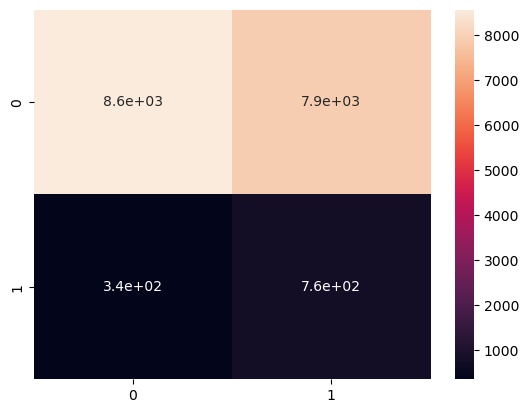

In [68]:
sns.heatmap((confusion_matrix(y_test,y_pred_es)), annot=True)

In [69]:
print(confusion_matrix(y_test,y_pred_es))
print(accuracy_score(y_test,y_pred_es))
print(classification_report(y_test,y_pred_es))

[[8567 7913]
 [ 343  755]]
0.530321993400842
              precision    recall  f1-score   support

           0       0.96      0.52      0.67     16480
           1       0.09      0.69      0.15      1098

    accuracy                           0.53     17578
   macro avg       0.52      0.60      0.41     17578
weighted avg       0.91      0.53      0.64     17578



## 6. SMOTE

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
smote = SMOTE(sampling_strategy='minority')

In [72]:
X_train_smo,y_train_smo=smote.fit_resample(X_train,y_train)

In [73]:
classifier.fit(X_train_smo,y_train_smo)

RandomForestClassifier()

In [74]:
y_pred_smo=classifier.predict(X_test)

In [75]:
print(confusion_matrix(y_test,y_pred_smo))
print(accuracy_score(y_test,y_pred_smo))
print(classification_report(y_test,y_pred_smo))

[[15017  1463]
 [  970   128]]
0.8615883490727045
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     16480
           1       0.08      0.12      0.10      1098

    accuracy                           0.86     17578
   macro avg       0.51      0.51      0.51     17578
weighted avg       0.89      0.86      0.87     17578

